# Analysing Political Executives with AI

## Install the packages for data anlysis in Python

In [16]:
# Install the packages for data analysis and visualisation
!pip install seaborn pandas matplotlib numpy IPython openpyxl

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Alternative to set svg for newer versions
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

## Read the data from Archigos excel document/dta data

In [2]:
# Read the original dta(Stata) data download from Archigos website.
# load the data
datafile = 'Archigos_4.1_stata14.dta'
data = pd.read_stata(datafile)

# Saving data to csv format.
# data.to_csv('Archigos_4.1_stata14.csv')

C:\Users\my\miniconda3\envs\DS\lib\site-packages\pandas\io\stata.py:1457: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


### The summary of our data

In [5]:
# Total data number
print(data.shape)

# See the types of each column
print(data.dtypes)

# Look at the head of our file.
data.head()

(3409, 28)
obsid                        object
leadid                       object
ccode                         int16
idacr                        object
leader                       object
startdate                    object
eindate              datetime64[ns]
enddate                      object
eoutdate             datetime64[ns]
entry                        object
exit                         object
exitcode                     object
prevtimesinoffice              int8
posttenurefate               object
gender                       object
yrborn                        int16
yrdied                        int16
borndate                     object
ebirthdate           datetime64[ns]
deathdate                    object
edeathdate           datetime64[ns]
dbpediauri                   object
numentry                      int16
numexit                     float32
numexitcode                   int16
numposttenurefate           float32
fties                        object
ftcur            

,obsid,leadid,ccode,idacr,leader,startdate,eindate,enddate,eoutdate,entry,...,ebirthdate,deathdate,edeathdate,dbpediauri,numentry,numexit,numexitcode,numposttenurefate,fties,ftcur
0,USA-1869,81dcc176-1e42-11e4-b4cd-db5882bf8def,2,USA,Grant,1869-03-04,1869-03-04,1877-03-04,1877-03-04,Regular,...,NaT,1885-07-23,1885-07-23,https://urldefense.proofpoint.com/v2/url?u=htt...,0,1.0,0,0.0,NA,NA
1,USA-1877,81dcc177-1e42-11e4-b4cd-db5882bf8def,2,USA,Hayes,1877-03-04,1877-03-04,1881-03-04,1881-03-04,Regular,...,NaT,1893-01-17,1893-01-17,https://urldefense.proofpoint.com/v2/url?u=htt...,0,1.0,0,0.0,NA,NA
2,USA-1881-1,81dcf24a-1e42-11e4-b4cd-db5882bf8def,2,USA,Garfield,1881-03-04,1881-03-04,1881-09-19,1881-09-19,Regular,...,NaT,1881-09-19,1881-09-19,https://urldefense.proofpoint.com/v2/url?u=htt...,0,3.0,11,3.0,NA,NA
3,USA-1881-2,81dcf24b-1e42-11e4-b4cd-db5882bf8def,2,USA,Arthur,1881-09-19,1881-09-19,1885-03-04,1885-03-04,Regular,...,NaT,1886-11-18,1886-11-18,https://urldefense.proofpoint.com/v2/url?u=htt...,0,1.0,0,0.0,NA,NA
4,USA-1885,34fb1558-3bbd-11e5-afeb-eb6f07f9fec7,2,USA,Cleveland,1885-03-04,1885-03-04,1889-03-04,1889-03-04,Regular,...,NaT,1908-06-24,1908-06-24,https://urldefense.proofpoint.com/v2/url?u=htt...,0,1.0,0,0.0,NA,NA


In [11]:
# # Group by leaders
# data_leader = data.groupby(['leader'])
# data_leader.first()

In [6]:
# Startdate is better than eindate, enddate is better than eoutdate
# Change the data type of startdate and enddate to datatime
data['startdate'] = data['startdate'].astype('datetime64[ns]')
data['enddate'] = data['enddate'].astype('datetime64[ns]')
data['yrbegin'] = pd.DatetimeIndex(data['startdate']).year
data['yrend'] = pd.DatetimeIndex(data['enddate']).year

## Merging data from other files

In [8]:
# Import the data about countries grouped by three categories: Autocracy, Anocracy, Democracy
data_deau = pd.read_excel('DeorAu_group.xlsx')
# load another excel file mpd2020 with gdppc and pop
data_gdp = pd.read_excel('mpd2020.xlsx', 'Full data')

print(data_deau.shape)
print(data_gdp.shape)

(163, 6)
(21682, 5)


In [9]:
# Combine data_deau with data_leader with key id=countries
# type(data_leaders)
# type(data_deau)
# Rename the Country-id to idacr in data_deau
data_deau = data_deau.rename({'Country-id': 'idacr'}, axis=1)
data_leader_deau = pd.merge(data, data_deau, how ='left', on ='idacr')

print(data_leader_deau.shape)
print(data_leader_deau.dtypes)
data_leader_deau.describe()

(3409, 35)
obsid                                        object
leadid                                       object
ccode                                         int16
idacr                                        object
leader                                       object
startdate                            datetime64[ns]
eindate                              datetime64[ns]
enddate                              datetime64[ns]
eoutdate                             datetime64[ns]
entry                                        object
exit                                         object
exitcode                                     object
prevtimesinoffice                              int8
posttenurefate                               object
gender                                       object
yrborn                                        int16
yrdied                                        int16
borndate                                     object
ebirthdate                           datetime64[ns]
d

In [10]:
# Reading data_leader_deau.xlsx file.
data_leader_deau.to_excel(r'data_leader_deau.xlsx', index = False)

# Rename the countrycode to idacr in data_gdp
data_gdp = data_gdp.rename({'countrycode': 'idacr'}, axis=1)

# Rename the year in gdppc to yrend to merge data
data_gdp = data_gdp.rename({'year': 'yrend'}, axis=1)

# Change the float to int
data_leader_deau['yrend'] = data_leader_deau['yrend'].fillna(0.0).astype(int)
data_leader_deau['yrbegin'] = data_leader_deau['yrbegin'].fillna(0.0).astype(int)

# Combine data_leaders_deau with data_gdp with key idacr and year
# type(data_leader)
# type(data_deau)
data_leader_deau_gdp = pd.merge(data_leader_deau, data_gdp, how ='left', on =['idacr', 'yrend'])

# Rename the gdppc to end_gdppc in data_leaders_deau_gdp
data_leader_deau_gdp = data_leader_deau_gdp.rename({'gdppc': 'end_gdppc'}, axis=1)

# Saving for safe
data_leader_deau_gdp.to_csv(r'data_leader_deau_gdp.csv', index = False)

# Saving for safe
data_leader_deau_gdp = pd.read_csv('data_leader_deau_gdp.csv')
data_gdp = pd.read_excel('data_gdp.xlsx')

data_gdp = data_gdp.rename({'year': 'yrbegin'}, axis=1)

data_gdp.to_excel(r'data_gdp.xlsx', index = False)

data_all = pd.merge(data_leader_deau_gdp, data_gdp, how ='left', on =['idacr', 'yrbegin'])

# Rename the gdppc to begin_gdppc in data_all
data_all = data_all.rename({'gdppc': 'begin_gdppc'}, axis=1)

# Saving for safe
data_all.to_csv(r'data_all.csv', index = False)

print(data_all.shape)
print(data_all.dtypes)

(3409, 41)


obsid                                 object
leadid                                object
ccode                                  int64
idacr                                 object
leader                                object
startdate                             object
eindate                               object
enddate                               object
eoutdate                              object
entry                                 object
exit                                  object
exitcode                              object
prevtimesinoffice                      int64
posttenurefate                        object
gender                                object
yrborn                                 int64
yrdied                                 int64
borndate                              object
ebirthdate                            object
deathdate                             object
edeathdate                            object
dbpediauri                            object
numentry  

## Data cleaning 

### Delete the irrelevant data with irrelevant columns

In [11]:
data_all.drop(columns=['obsid',
                   'leadid',
                   'idacr',
                   'startdate',
                   'eindate',
                   'enddate',
                   'eoutdate',
                   'borndate',
                   'ebirthdate',
                   'deathdate',
                   'edeathdate',
                   'dbpediauri',
                  'numexitcode',
                  'numposttenurefate',
                  'ftcur',
                  'Country',
                  'Polity datasets IV number[11][12]',
                  'Polity datasets IV category',
                  'country_x',
                  'country_y'], inplace=True)

print(data_all.dtypes)

In [12]:
# Deal with family ties and gender 
data_all['fties_range'] = np.where(data_all['fties'].isnull(), 0.5, 1)
data_all['gender'] = np.where(data_all['gender']=='M', 0.5, 1)

In [13]:
data_all.drop(columns=['fties',
                       'Democracy',
                       'Autocracy'], inplace=True)
                       
print(data_all.shape)
data_all.describe()

(3409, 19)


,ccode,prevtimesinoffice,gender,yrborn,yrdied,numentry,numexit,yrbegin,yrend,end_gdppc,pop_x,begin_gdppc,pop_y,fties_range
count,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,1486.000000,1.504000e+03,1454.000000,1.472000e+03,3409.000000
mean,364.709006,0.261954,0.511147,1885.202699,1109.689352,-0.199765,-42.900440,1954.618656,1958.806688,8234.988179,4.245671e+04,7642.369122,4.060293e+04,0.539454
std,248.697510,0.645287,0.073830,219.666739,1264.333456,16.139312,193.453556,40.189093,40.491796,11076.028911,1.302039e+05,9862.023005,1.231307e+05,0.134818
min,2.000000,0.000000,0.500000,-999.000000,-999.000000,-666.000000,-888.000000,1840.000000,1871.000000,377.580100,1.344080e+02,377.580100,1.244890e+02,0.500000
25%,155.000000,0.000000,0.500000,1870.000000,-777.000000,0.000000,1.000000,1923.000000,1925.000000,2291.000000,2.968118e+03,2232.854500,2.846500e+03,0.500000
50%,325.000000,0.000000,0.500000,1906.000000,1931.000000,0.000000,1.000000,1960.000000,1963.000000,4362.500000,8.242966e+03,4089.768950,7.699363e+03,0.500000
75%,560.000000,0.000000,0.500000,1936.000000,1972.000000,0.000000,2.000000,1991.000000,1995.000000,9566.406450,3.190668e+04,8490.654525,2.987025e+04,0.500000
max,950.000000,6.000000,1.000000,1983.000000,2015.000000,2.000000,4.000000,2015.000000,2015.000000,156029.000000,1.364827e+06,154159.000000,1.344394e+06,1.000000


In [14]:
# Group by leader
print(data['leader'].unique())

# Saving data
data_all.to_csv(r'data_leader.csv', index = False)

['Grant' 'Hayes' 'Garfield' ... 'Bainimarama' 'Laisenia Qarase'
 'Senilagakali']


### Delete the columns that more than 30% is null 

In [15]:
# Delete the column >= 30% is null, we can see the remaining column names.
null_sum=data.isnull().sum()
data.columns[null_sum<len(data)*0.3] # columns will keep

# Drop the columns that at least 30% values are null
data.drop(columns=data.columns[null_sum > len(data)*0.3], inplace=True)

# Check the data types
print(data.dtypes)

# Check if there are any abnormal values, we need to pay attention to the negative numbers. 
# Some leaders are still alive, so the yrdied is negative number, etc.
print(data.describe())

obsid                        object
leadid                       object
ccode                         int16
idacr                        object
leader                       object
startdate            datetime64[ns]
eindate              datetime64[ns]
enddate              datetime64[ns]
eoutdate             datetime64[ns]
entry                        object
exit                         object
exitcode                     object
prevtimesinoffice              int8
posttenurefate               object
gender                       object
yrborn                        int16
yrdied                        int16
borndate                     object
deathdate                    object
dbpediauri                   object
numentry                      int16
numexit                     float32
numexitcode                   int16
numposttenurefate           float32
fties                        object
ftcur                        object
yrbegin                       int64
yrend                       

### The summary of entry and exit, we only focus on the entry and exit are normal

In [16]:
#First we see the characteristics of entry, there are four different kinds of types.
data.groupby(['entry']).mean()

,ccode,prevtimesinoffice,yrborn,yrdied,numentry,numexit,numexitcode,numposttenurefate,yrbegin,yrend
entry,,,,,,,,,,
Foreign Imposition,503.625000,0.175000,1746.825000,1396.625000,2.0,-14.700000,-95.325000,-132.850006,1941.825000,1947.950000
Irregular,353.661996,0.136602,1854.865149,1370.528897,1.0,-16.592470,-120.197898,-90.437828,1949.007005,1953.793345
Regular,364.985694,0.288984,1893.385193,1051.718526,0.0,-48.230793,-77.191345,-117.908333,1955.975680,1960.016452
Unknown,353.500000,0.000000,1875.000000,1944.500000,-666.0,-666.000000,-999.000000,-666.000000,1915.500000,1916.000000


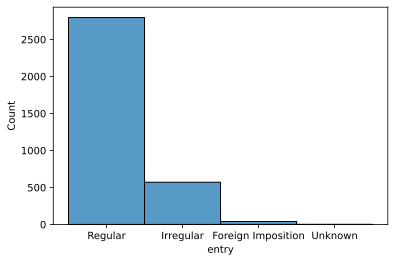

In [17]:
#Group the leaders by entry, see the compare between each group.
ax= sns.histplot(data['entry'])

In [18]:
#Second we see the characteristics of exit, there are eight different kinds of types.
data.groupby(['exit']).mean()

,ccode,prevtimesinoffice,yrborn,yrdied,numentry,numexit,numexitcode,numposttenurefate,yrbegin,yrend
exit,,,,,,,,,,
Foreign,455.569444,0.263889,1766.888889,1679.125000,0.527778,4.0,-291.916667,1.041667,1931.986111,1938.097222
Irregular,361.883333,0.226667,1872.536667,1485.101667,0.441667,3.0,-196.600000,-8.819667,1946.095000,1950.928333
Natural Death,453.688119,0.113861,1843.806931,1853.108911,0.247525,2.0,0.000000,-779.197998,1937.653465,1949.544554
Regular,346.609682,0.292194,1890.672918,1047.368513,0.121239,1.0,0.000000,-24.842564,1955.354993,1958.407763
Retired Due to Ill Health,398.338235,0.338235,1890.058824,1674.485294,0.073529,2.1,0.000000,-228.455887,1949.205882,1954.426471
Still in Office,466.297619,0.130952,1954.208333,-777.000000,0.071429,-888.0,-882.714286,-888.660706,2008.071429,2014.982143
Suicide,147.333333,0.000000,1901.000000,1955.333333,0.333333,2.2,0.000000,-516.966675,1949.333333,1955.333333
Unknown,358.000000,0.000000,1874.000000,1944.666667,-443.333333,-666.0,-999.000000,-666.000000,1916.666667,1917.000000


<AxesSubplot:xlabel='count', ylabel='exit'>

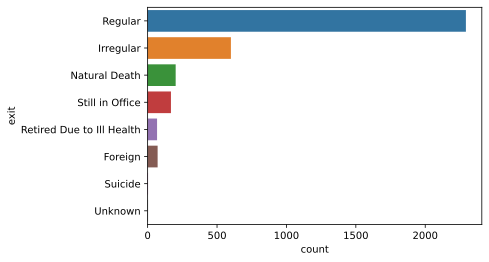

In [19]:
#Group the leaders by exit, see the compare between each group.
sns.countplot(y='exit',data=data)

### Change the columns startdate/enddate/yrborn/yrdied into datetime

- Add new columns named yrbegin and yrend

In [20]:
# Startdate is better than eindate, enddate is better than eoutdate
# Change the data type of startdate and enddate to datatime
data['startdate'] = data['startdate'].astype('datetime64[ns]')
data['enddate'] = data['enddate'].astype('datetime64[ns]')

In [21]:
# Add a new column, yrbegin is the year of eindate, because eindate with data about year/month/day
# we only need year data.
data['yrbegin'] = pd.DatetimeIndex(data['startdate']).year
data['yrend'] = pd.DatetimeIndex(data['enddate']).year
print(data.dtypes)

obsid                        object
leadid                       object
ccode                         int16
idacr                        object
leader                       object
startdate            datetime64[ns]
eindate              datetime64[ns]
enddate              datetime64[ns]
eoutdate             datetime64[ns]
entry                        object
exit                         object
exitcode                     object
prevtimesinoffice              int8
posttenurefate               object
gender                       object
yrborn                        int16
yrdied                        int16
borndate                     object
deathdate                    object
dbpediauri                   object
numentry                      int16
numexit                     float32
numexitcode                   int16
numposttenurefate           float32
fties                        object
ftcur                        object
yrbegin                       int64
yrend                       

In [22]:
# See the characteristics of yrbegin and check the data yrbegin again
data.groupby(['yrbegin']).mean()

,ccode,prevtimesinoffice,yrborn,yrdied,numentry,numexit,numexitcode,numposttenurefate,yrend
yrbegin,,,,,,,,,
1840,140.000000,0.000000,1825.000000,1891.000000,0.000000,3.000000,-999.000000,1.000000,1889.000000
1846,790.000000,0.000000,1817.000000,1877.000000,0.000000,2.000000,0.000000,-777.000000,1877.000000
1847,815.000000,0.000000,1829.000000,1883.000000,1.000000,2.000000,0.000000,-777.000000,1883.000000
1848,465.000000,0.000000,1830.500000,1906.000000,0.000000,2.500000,-499.500000,-387.000000,1906.000000
1853,775.000000,0.000000,1808.000000,1878.000000,1.000000,2.000000,0.000000,-777.000000,1878.000000
...,...,...,...,...,...,...,...,...,...
2011,500.121212,0.090909,1952.909091,-692.424242,0.060606,-376.121216,-376.727273,-491.090912,2013.727273
2012,404.861111,0.222222,1953.388889,-699.500000,0.083333,-394.000000,-394.444444,-496.138885,2013.972222
2013,503.000000,0.066667,1860.466667,-777.000000,0.066667,-473.133331,-473.600000,-540.166687,2014.466667


In [23]:
#See the characteristics of yrend, yrbegin
data.describe()

,ccode,prevtimesinoffice,yrborn,yrdied,numentry,numexit,numexitcode,numposttenurefate,yrbegin,yrend
count,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000
mean,364.709006,0.261954,1885.202699,1109.689352,-0.199765,-42.900448,-85.148431,-113.803955,1954.618656,1958.806688
std,248.697510,0.645287,219.666739,1264.333456,16.139312,193.453995,272.930048,285.497925,40.189093,40.491796
min,2.000000,0.000000,-999.000000,-999.000000,-666.000000,-888.000000,-999.000000,-999.000000,1840.000000,1871.000000
25%,155.000000,0.000000,1870.000000,-777.000000,0.000000,1.000000,0.000000,0.000000,1923.000000,1925.000000
50%,325.000000,0.000000,1906.000000,1931.000000,0.000000,1.000000,0.000000,0.000000,1960.000000,1963.000000
75%,560.000000,0.000000,1936.000000,1972.000000,0.000000,2.000000,0.000000,0.000000,1991.000000,1995.000000
max,950.000000,6.000000,1983.000000,2015.000000,2.000000,4.000000,111.000000,3.100000,2015.000000,2015.000000


In [24]:
#Group by leaders
data.groupby('leader').mean() #2757 leaders

,ccode,prevtimesinoffice,yrborn,yrdied,numentry,numexit,numexitcode,numposttenurefate,yrbegin,yrend
leader,,,,,,,,,,
13th Dalai Lama,711.0,0.0,1876.0,1933.0,0.0,2.00,0.0,-777.0,1895.0,1933.0
14th Dalai Lama,711.0,0.0,1935.0,-777.0,0.0,4.00,9.0,1.0,1950.0,1951.0
A. H. J. Lovink,850.0,0.0,1902.0,1995.0,2.0,1.00,0.0,1.0,1949.0,1949.0
A. Nastase,360.0,0.0,1950.0,-777.0,0.0,1.00,0.0,0.0,2000.0,2004.0
A. Papandreou,350.0,0.5,1919.0,1996.0,0.0,1.55,0.0,-388.5,1987.0,1992.0
...,...,...,...,...,...,...,...,...,...,...
van der Linden,210.0,0.0,1846.0,1935.0,0.0,1.00,0.0,0.0,1913.0,1918.0
van der Vyvere,211.0,0.0,1871.0,1961.0,0.0,1.00,0.0,0.0,1925.0,1925.0
von Moos,225.0,0.5,1910.0,1990.0,0.0,1.00,0.0,0.0,1966.5,1966.5


In [25]:
print(data.shape)

# Find duplicates and sum the duplicates.
print(data.leader.duplicated().sum())

# Sum the non-duplicates.
print((~data.leader.duplicated()).sum())

data.groupby(['idacr']).describe() #189 countries

(3409, 28)


In [27]:
# We delete 'leadid', 'dbpediauri', and add 'yrbegin', just have a look if it goes right.
data.head()

# Delete if yrbegin > yrend, age < 0
print(data[data['yrbegin'] > data['yrend']]) #age < 0

(data['yrbegin'] < 0).count() #yrbegin > 0

Empty DataFrame
Columns: [obsid, leadid, ccode, idacr, leader, startdate, eindate, enddate, eoutdate, entry, exit, exitcode, prevtimesinoffice, posttenurefate, gender, yrborn, yrdied, borndate, deathdate, dbpediauri, numentry, numexit, numexitcode, numposttenurefate, fties, ftcur, yrbegin, yrend]
Index: []

[0 rows x 28 columns]


3409

In [28]:
# Delete the data yrbegin < 0, yrend < 0, yrborn<0, yrdied<0
data.drop(data[data['yrborn']<0].index , inplace=True) 
data.drop(data[data['yrdied']<0].index, inplace=True)
data.drop(data[data['yrbegin']<0].index , inplace=True) 
data.drop(data[data['yrend']<0].index, inplace=True)
print(data.shape)

data.describe()

# Find if yrbegin > yrdied, lifespan < 0 
print(data[data['yrbegin'] > data['yrdied']]) # begin to come into power after the leader is died.

(2350, 28)
Empty DataFrame
Columns: [obsid, leadid, ccode, idacr, leader, startdate, eindate, enddate, eoutdate, entry, exit, exitcode, prevtimesinoffice, posttenurefate, gender, yrborn, yrdied, borndate, deathdate, dbpediauri, numentry, numexit, numexitcode, numposttenurefate, fties, ftcur, yrbegin, yrend]
Index: []

[0 rows x 28 columns]


In [29]:
#Delete the data yrbegin > yrdied
data.drop(data[data['yrbegin'] > data['yrdied']].index, inplace=True) 
print(data.shape)

data.to_excel(r'data_all_leaders.xlsx', index = False)
# tranfert the .py file to excel

(2350, 28)


## Calculate the leaders' age, when they first into power

- Check the overall data again

In [30]:
data.describe()

,ccode,prevtimesinoffice,yrborn,yrdied,numentry,numexit,numexitcode,numposttenurefate,yrbegin,yrend
count,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.00000,2350.000000,2350.000000,2350.000000
mean,337.682553,0.310638,1882.213617,1954.623404,-0.350213,0.764553,-59.47617,-85.238594,1936.048511,1940.040000
std,242.948455,0.716299,32.755469,34.776203,19.436449,23.860554,240.23647,240.783173,33.119727,33.344993
min,2.000000,0.000000,1797.000000,1875.000000,-666.000000,-666.000000,-999.00000,-777.000000,1840.000000,1871.000000
25%,145.000000,0.000000,1859.000000,1928.000000,0.000000,1.000000,0.00000,0.000000,1912.000000,1915.000000
50%,230.000000,0.000000,1883.000000,1956.000000,0.000000,1.000000,0.00000,0.000000,1936.000000,1940.000000
75%,481.000000,0.000000,1909.000000,1983.000000,0.000000,2.100000,0.00000,0.000000,1962.000000,1966.000000
max,950.000000,6.000000,1962.000000,2015.000000,2.000000,4.000000,111.00000,3.100000,2012.000000,2014.000000


In [31]:
# See the characteristics of yrborn, there is something wrong in the data. 
# Because I change the data type of yrborn, from int to datetime.
data.groupby(['yrborn']).mean()

,ccode,prevtimesinoffice,yrdied,numentry,numexit,numexitcode,numposttenurefate,yrbegin,yrend
yrborn,,,,,,,,,
1797,255.000000,0.000000,1888.0,0.000000,2.000,0.0,-777.000000,1858.000000,1888.0
1798,220.000000,1.500000,1881.0,0.000000,1.000,0.0,0.000000,1876.500000,1877.5
1804,172.500000,1.000000,1882.5,0.000000,2.000,-499.5,1.000000,1874.000000,1878.0
1808,325.666667,0.333333,1882.0,0.333333,2.000,-333.0,-480.666656,1869.333333,1878.0
1809,262.500000,1.750000,1892.5,0.250000,1.275,0.0,0.000000,1882.500000,1885.0
...,...,...,...,...,...,...,...,...,...
1955,523.000000,0.000000,2003.0,0.500000,2.500,55.5,-387.000000,1992.500000,2003.0
1956,404.000000,1.000000,2012.0,0.000000,2.000,0.0,-777.000000,2009.000000,2011.0
1960,451.000000,0.000000,2003.0,1.000000,4.000,9.0,0.000000,1997.000000,1998.0


In [32]:
#age= yrbegin- yrborn
data['age'] = data['yrbegin'] - data['yrborn']
print(data['age'])

0       47
1       55
2       50
3       52
4       48
        ..
3389    47
3398    50
3399    53
3401    67
3407    77
Name: age, Length: 2350, dtype: int64


In [33]:
# See the distribution of age
data.groupby(['age']).mean()

,ccode,prevtimesinoffice,yrborn,yrdied,numentry,numexit,numexitcode,numposttenurefate,yrbegin,yrend
age,,,,,,,,,,
11,722.500000,0.000000,1888.000000,1942.000000,0.000000,3.500000,-496.50,0.500000,1899.000000,1914.000000
13,600.000000,0.000000,1881.000000,1943.000000,0.000000,3.000000,-999.00,0.000000,1894.000000,1908.000000
15,470.000000,0.000000,1839.000000,1900.500000,0.000000,2.500000,-499.50,-388.000000,1854.000000,1899.500000
16,695.500000,0.000000,1886.000000,1938.500000,0.000000,2.000000,3.00,0.500000,1902.000000,1918.500000
17,540.750000,0.000000,1884.000000,1933.250000,0.250000,2.750000,-749.25,-192.250000,1901.000000,1928.500000
...,...,...,...,...,...,...,...,...,...,...
82,145.333333,0.000000,1846.000000,1932.666667,0.666667,2.333333,-331.00,0.333333,1928.000000,1930.333333
83,200.000000,3.000000,1809.000000,1898.000000,0.000000,1.000000,0.00,0.000000,1892.000000,1894.000000
84,223.333333,0.333333,1843.666667,1934.000000,0.000000,1.666667,-333.00,0.666667,1927.666667,1929.333333


In [133]:
#See the leaders' age
# data.groupby(['leader']).mean() #1846 leaders

,ccode,prevtimesinoffice,yrborn,yrdied,numentry,numexit,numexitcode,numposttenurefate,yrbegin,yrend,age
leader,,,,,,,,,,,
13th Dalai Lama,711.0,0.0,1876.0,1933.0,0.0,2.00,0.0,-777.0,1895.0,1933.0,19.0
A. H. J. Lovink,850.0,0.0,1902.0,1995.0,2.0,1.00,0.0,1.0,1949.0,1949.0,47.0
A. Papandreou,350.0,0.5,1919.0,1996.0,0.0,1.55,0.0,-388.5,1987.0,1992.0,68.0
A. Simon,41.0,0.0,1844.0,1923.0,1.0,3.00,-999.0,1.0,1908.0,1911.0,64.0
A. Zanartu Zanartu,155.0,0.0,1847.0,1902.0,0.0,1.00,0.0,-777.0,1901.0,1901.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...
van der Linden,210.0,0.0,1846.0,1935.0,0.0,1.00,0.0,0.0,1913.0,1918.0,67.0
van der Vyvere,211.0,0.0,1871.0,1961.0,0.0,1.00,0.0,0.0,1925.0,1925.0,54.0
von Moos,225.0,0.5,1910.0,1990.0,0.0,1.00,0.0,0.0,1966.5,1966.5,56.5


### Duplicated leader with more than one age, we pick up the first

In [134]:
# Find duplicates and sum the duplicates.
print(data.leader.duplicated().sum())

# Sum the non-duplicates.
print((~data.leader.duplicated()).sum())

# The first occurrence gets kept, and all others get identified as duplicates
data.leader=data.leader.drop_duplicates(keep='first')

504

In [137]:
# Save the groupby leader dataframe
data_leader = data.groupby(['leader'])
data.to_excel(r'/Users/zhaoshuai/Desktop/DA/Data/Data-2016/data_all_leaders_group.xlsx', index = False)

print(data_leader.dtypes)

data_leader.describe()

### Draw a figure about age

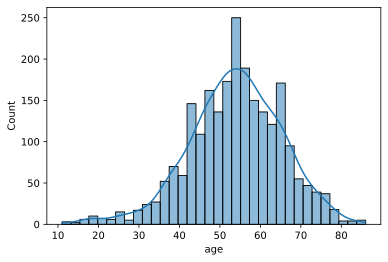

In [35]:
#See the distribution of age
import seaborn as sns
ax = sns.histplot(data.age, kde=True)

<AxesSubplot:xlabel='age', ylabel='Count'>

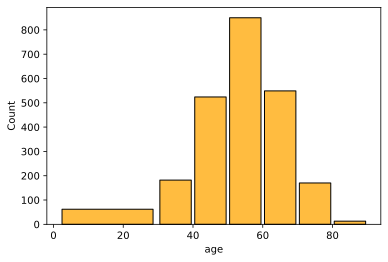

In [36]:
import seaborn as sns
sns.histplot(data.age,bins=[1, 30, 40, 50, 60, 70, 80, 90] ,color = 'orange', shrink=.9)

## Calculate their tenure
 
- Calculate the tenure
- Check the data about our data about tenure 
- Delete tenure < 1
- Group the data by leaders and sum their tenure together ？？

In [37]:
#tenure= enddate or eoutdate - startdate  or  eindate (Unit: years)
# if enddate is null, it has two possibilities: 1. leader is still in office, use the date now; 2. not available.  

import datetime

data['startdate'] = pd.to_datetime(data['startdate']).dt.date
data['enddate'] = pd.to_datetime(data['enddate']).dt.date

data['enddate'] = np.where(data['enddate'].isnull(),
                                datetime.datetime.now().date(),
                                data['enddate'])

data['tenure'] = (data['enddate'] - data['startdate'])/np.timedelta64(1, 'Y')

In [141]:
data.describe()

,ccode,prevtimesinoffice,yrborn,yrdied,numentry,numexit,numexitcode,numposttenurefate,yrbegin,yrend,age,tenure
count,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.00000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000
mean,337.682553,0.310638,1882.213617,1954.623404,-0.350213,0.764553,-59.47617,-85.238594,1936.048511,1940.040000,53.834894,4.037455
std,242.948455,0.716299,32.755469,34.776203,19.436449,23.860775,240.23647,240.784698,33.119727,33.344993,11.441076,6.531877
min,2.000000,0.000000,1797.000000,1875.000000,-666.000000,-666.000000,-999.00000,-777.000000,1840.000000,1871.000000,11.000000,0.000000
25%,145.000000,0.000000,1859.000000,1928.000000,0.000000,1.000000,0.00000,0.000000,1912.000000,1915.000000,47.000000,0.616029
50%,230.000000,0.000000,1883.000000,1956.000000,0.000000,1.000000,0.00000,0.000000,1936.000000,1940.000000,54.000000,1.770057
75%,481.000000,0.000000,1909.000000,1983.000000,0.000000,2.100000,0.00000,0.000000,1962.000000,1966.000000,62.000000,4.321102
max,950.000000,6.000000,1962.000000,2015.000000,2.000000,4.000000,111.00000,3.100000,2012.000000,2014.000000,86.000000,67.968541


In [38]:
data.groupby(['tenure']).mean()

,ccode,prevtimesinoffice,yrborn,yrdied,numentry,numexit,numexitcode,numposttenurefate,yrbegin,yrend,age
tenure,,,,,,,,,,,
0.000000,129.750000,0.500000,1881.000000,1953.000000,0.250000,1.5,1.500,-166.250000,1937.250000,1937.250000,56.250000
0.002738,365.666667,0.333333,1899.000000,1978.666667,0.666667,1.0,0.000,0.333333,1946.333333,1946.333333,47.333333
0.005476,302.700000,0.100000,1895.600000,1974.200000,0.700000,2.6,6.800,-65.599998,1948.900000,1948.900000,53.300000
0.008214,341.125000,0.000000,1885.875000,1953.875000,0.250000,2.0,-121.625,0.750000,1929.750000,1929.750000,43.875000
0.010952,256.666667,0.416667,1877.666667,1947.583333,0.250000,1.5,1.500,0.166667,1932.416667,1932.416667,54.750000
...,...,...,...,...,...,...,...,...,...,...,...
48.384293,360.000000,0.000000,1839.000000,1914.000000,0.000000,2.0,0.000,-777.000000,1866.000000,1914.000000,27.000000
49.315181,140.000000,0.000000,1825.000000,1891.000000,0.000000,3.0,-999.000,1.000000,1840.000000,1889.000000,15.000000
49.966803,350.000000,0.000000,1845.000000,1913.000000,0.000000,3.0,-999.000,3.000000,1863.000000,1913.000000,18.000000


In [39]:
data.drop(data[data['tenure'] < 1].index , inplace=True)
print(data)

           obsid                                leadid  ccode idacr  \
0       USA-1869  81dcc176-1e42-11e4-b4cd-db5882bf8def      2   USA   
1       USA-1877  81dcc177-1e42-11e4-b4cd-db5882bf8def      2   USA   
3     USA-1881-2  81dcf24b-1e42-11e4-b4cd-db5882bf8def      2   USA   
4       USA-1885  34fb1558-3bbd-11e5-afeb-eb6f07f9fec7      2   USA   
5       USA-1889  81dcf24d-1e42-11e4-b4cd-db5882bf8def      2   USA   
...          ...                                   ...    ...   ...   
3386    SOL-1989  824f6586-1e42-11e4-b4cd-db5882bf8def    940   SOL   
3388    SOL-1994  824f6586-1e42-11e4-b4cd-db5882bf8def    940   SOL   
3389    SOL-1997  824f9657-1e42-11e4-b4cd-db5882bf8def    940   SOL   
3398    FJI-1970  824f965a-1e42-11e4-b4cd-db5882bf8def    950   FJI   
3401  FJI-1987-3  824f965a-1e42-11e4-b4cd-db5882bf8def    950   FJI   

         leader   startdate    eindate     enddate   eoutdate      entry  ...  \
0         Grant  1869-03-04 1869-03-04  1877-03-04 1877-03-04    R

In [144]:
#add tenure to the excel grouped by leaders
data.to_excel(r'data_all_leaders_group.xlsx', index = False)

data=pd.read_excel(r'data_all_leaders_group.xlsx')

In [151]:
# Some leaders may have more than one term
# Tenure: merge the duplicates and sum the tenure.
# data=data.groupby(['leader']).sum()
# print(data)

                 ccode  prevtimesinoffice  yrborn  yrdied  numentry  numexit  \
leader                                                                         
13th Dalai Lama    711                  0    1876    1933         0      2.0   
A. Papandreou      350                  0    1919    1996         0      1.0   
A. Simon            41                  0    1844    1923         1      3.0   
AL-Sallal          678                  0    1917    1994         1      3.0   
Abacha             475                  0    1943    1998         1      2.0   
...                ...                ...     ...     ...       ...      ...   
van Houtte         211                  0    1907    1991         0      1.0   
van Lynden         210                  0    1826    1885         0      1.0   
van Tienhoven      210                  0    1841    1914         0      1.0   
van ZeeLand        211                  0    1893    1973         0      1.0   
van der Linden     210                  

In [40]:
#Check if there are any abonormal data.
data.describe()

,ccode,prevtimesinoffice,yrborn,yrdied,numentry,numexit,numexitcode,numposttenurefate,yrbegin,yrend,age,tenure
count,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000
mean,352.120000,0.280702,1883.223158,1955.098246,0.211930,1.712561,-68.974035,-112.483994,1935.806316,1942.162105,52.583158,6.347877
std,257.524833,0.670254,33.635365,35.838024,0.445008,0.925551,257.104687,272.922272,34.468278,34.662291,11.879793,7.532185
min,2.000000,0.000000,1797.000000,1875.000000,0.000000,1.000000,-999.000000,-777.000000,1840.000000,1871.000000,11.000000,1.002074
25%,135.000000,0.000000,1858.000000,1927.000000,0.000000,1.000000,0.000000,0.000000,1911.000000,1915.000000,46.000000,2.228656
50%,305.000000,0.000000,1885.000000,1959.000000,0.000000,1.000000,0.000000,0.000000,1938.000000,1945.000000,53.000000,4.000082
75%,564.000000,0.000000,1911.000000,1984.000000,0.000000,3.000000,0.000000,1.000000,1963.000000,1971.000000,61.000000,6.417654
max,950.000000,6.000000,1962.000000,2014.000000,2.000000,4.000000,111.000000,3.100000,2012.000000,2014.000000,86.000000,67.968541


In [41]:
data.head()

,obsid,leadid,ccode,idacr,leader,startdate,eindate,enddate,eoutdate,entry,...,numentry,numexit,numexitcode,numposttenurefate,fties,ftcur,yrbegin,yrend,age,tenure
0,USA-1869,81dcc176-1e42-11e4-b4cd-db5882bf8def,2,USA,Grant,1869-03-04,1869-03-04,1877-03-04,1877-03-04,Regular,...,0,1.0,0,0.0,NA,NA,1869,1877,47,8.000164
1,USA-1877,81dcc177-1e42-11e4-b4cd-db5882bf8def,2,USA,Hayes,1877-03-04,1877-03-04,1881-03-04,1881-03-04,Regular,...,0,1.0,0,0.0,NA,NA,1877,1881,55,4.000082
3,USA-1881-2,81dcf24b-1e42-11e4-b4cd-db5882bf8def,2,USA,Arthur,1881-09-19,1881-09-19,1885-03-04,1885-03-04,Regular,...,0,1.0,0,0.0,NA,NA,1881,1885,52,3.455239
4,USA-1885,34fb1558-3bbd-11e5-afeb-eb6f07f9fec7,2,USA,Cleveland,1885-03-04,1885-03-04,1889-03-04,1889-03-04,Regular,...,0,1.0,0,0.0,NA,NA,1885,1889,48,4.000082
5,USA-1889,81dcf24d-1e42-11e4-b4cd-db5882bf8def,2,USA,Harrison,1889-03-04,1889-03-04,1893-03-04,1893-03-04,Regular,...,0,1.0,0,0.0,NA,NA,1889,1893,56,4.000082


In [147]:
data.groupby(['tenure']).mean()

,ccode,prevtimesinoffice,yrborn,yrdied,numentry,numexit,numexitcode,numposttenurefate,yrbegin,yrend,age
tenure,,,,,,,,,,,
1.002074,215.666667,0.0,1886.333333,1960.666667,0.333333,1.0,0.00,0.00,1941.666667,1942.666667,55.333333
1.004812,241.000000,0.0,1891.250000,1949.750000,0.500000,2.0,-248.75,0.75,1946.500000,1947.500000,55.250000
1.007550,247.500000,0.0,1898.000000,1968.500000,0.000000,1.0,0.00,0.00,1953.000000,1954.000000,55.000000
1.010288,395.000000,0.0,1915.000000,1980.000000,0.000000,1.0,0.00,0.00,1970.000000,1971.000000,55.000000
1.013026,220.000000,0.0,1860.000000,1934.000000,0.000000,1.0,0.00,0.00,1912.000000,1913.000000,52.000000
...,...,...,...,...,...,...,...,...,...,...,...
48.384293,360.000000,0.0,1839.000000,1914.000000,0.000000,2.0,0.00,-777.00,1866.000000,1914.000000,27.000000
49.315181,140.000000,0.0,1825.000000,1891.000000,0.000000,3.0,-999.00,1.00,1840.000000,1889.000000,15.000000
49.966803,350.000000,0.0,1845.000000,1913.000000,0.000000,3.0,-999.00,3.00,1863.000000,1913.000000,18.000000


### Group the tenure into five possible values

- 1 for single term - equal to or less than 4 years; 
- 2 for two terms - between 5 and 8 years;
- 3 for three terms -  between 9 and 12 years;
- 4 for four terms - between 13 and 16 years;
- 5 for five or more terms)</font> 

In [42]:
#tenure group by five groups
tenure_groups= pd.cut(data['tenure'], bins=[1, 4, 8, 12, 16, 20, np.inf])
data.groupby(tenure_groups).mean()

,ccode,prevtimesinoffice,yrborn,yrdied,numentry,numexit,numexitcode,numposttenurefate,yrbegin,yrend,age,tenure
tenure,,,,,,,,,,,,
"(1.0, 4.0]",344.882353,0.365854,1879.365854,1950.955524,0.199426,1.672884,-80.159254,-82.362694,1934.338594,1936.635581,54.972740,2.286490
"(4.0, 8.0]",286.462069,0.239080,1884.687356,1957.517241,0.188506,1.526897,-46.733333,-69.825287,1937.705747,1942.885057,53.018391,5.165392
"(8.0, 12.0]",421.886792,0.216981,1892.320755,1963.235849,0.245283,1.936792,-52.613208,-107.122643,1943.433962,1953.226415,51.113208,9.789438
"(12.0, 16.0]",441.265625,0.203125,1892.687500,1961.781250,0.218750,2.132812,-45.187500,-290.904694,1941.500000,1955.296875,48.812500,13.814752
"(16.0, 20.0]",566.305556,0.055556,1894.916667,1965.388889,0.277778,2.086111,-109.472222,-298.388885,1940.222222,1957.805556,45.305556,17.499181
"(20.0, inf]",499.183908,0.034483,1883.919540,1957.103448,0.356322,2.221839,-111.241379,-365.448273,1922.758621,1953.206897,38.839080,30.497704


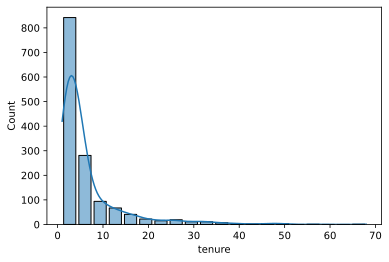

In [43]:
#See the distribution of tenure
ax = sns.histplot(data.tenure,kde=True, shrink = 0.8, bins=20) 

                 #, element="step", fill=False)

/Users/zhaoshuai/opt/anaconda3/envs/automl/lib/python3.7/site-packages/matplotlib/transforms.py:2052: RuntimeWarning: invalid value encountered in double_scalars
  self._mtx[0, 2] += tx
/Users/zhaoshuai/opt/anaconda3/envs/automl/lib/python3.7/site-packages/matplotlib/transforms.py:396: RuntimeWarning: invalid value encountered in double_scalars
  return (x0, y0, x1 - x0, y1 - y0)


<AxesSubplot:xlabel='tenure', ylabel='Count'>

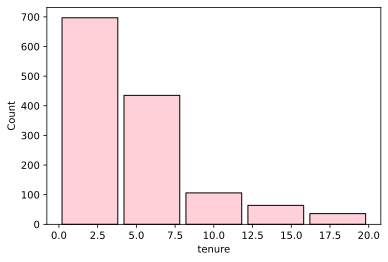

In [160]:
#See the distribution of tenure
sns.histplot(data.tenure,bins=[0, 4, 8, 12, 16, 20, np.inf], color = 'pink', shrink=.9)

In [44]:
data.dtypes

obsid                        object
leadid                       object
ccode                         int16
idacr                        object
leader                       object
startdate                    object
eindate              datetime64[ns]
enddate                      object
eoutdate             datetime64[ns]
entry                        object
exit                         object
exitcode                     object
prevtimesinoffice              int8
posttenurefate               object
gender                       object
yrborn                        int16
yrdied                        int16
borndate                     object
deathdate                    object
dbpediauri                   object
numentry                      int16
numexit                     float32
numexitcode                   int16
numposttenurefate           float32
fties                        object
ftcur                        object
yrbegin                       int64
yrend                       

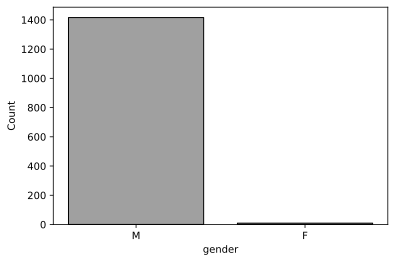

In [45]:
#Visualize the differences about leaders' gender for the whole data set
ax= sns.histplot(data.gender, shrink = 0.8, bins=10, color='grey') 

In [47]:
# The correlations of all the variables used in this study sample: leaders' age, leaders' tenure
corr= data.corr()
corr

,ccode,prevtimesinoffice,yrborn,yrdied,numentry,numexit,numexitcode,numposttenurefate,yrbegin,yrend,age,tenure
ccode,1.000000,-0.041250,0.278104,0.231228,0.045013,0.113614,0.121673,-0.158376,0.251759,0.292527,-0.056939,0.194136
prevtimesinoffice,-0.041250,1.000000,-0.105980,-0.051229,-0.072450,-0.051874,0.041662,0.098875,-0.006247,-0.033335,0.281935,-0.125652
yrborn,0.278104,-0.105980,1.000000,0.929940,0.048493,0.075855,0.308578,-0.027447,0.939434,0.944222,-0.105617,0.046153
yrdied,0.231228,-0.051229,0.929940,1.000000,0.003449,-0.025485,0.344421,0.063583,0.939328,0.944041,0.092437,0.046258
numentry,0.045013,-0.072450,0.048493,0.003449,1.000000,0.247746,-0.135663,-0.033963,0.005929,0.022128,-0.120098,0.073683
numexit,0.113614,-0.051874,0.075855,-0.025485,0.247746,1.000000,-0.425174,-0.098294,-0.007177,0.035642,-0.235591,0.197256
numexitcode,0.121673,0.041662,0.308578,0.344421,-0.135663,-0.425174,1.000000,-0.112054,0.362115,0.348473,0.176969,-0.054312
numposttenurefate,-0.158376,0.098875,-0.027447,0.063583,-0.033963,-0.098294,-0.112054,1.000000,-0.015091,-0.078093,0.033926,-0.289124
yrbegin,0.251759,-0.006247,0.939434,0.939328,0.005929,-0.007177,0.362115,-0.015091,1.000000,0.976265,0.241594,-0.083713
yrend,0.292527,-0.033335,0.944222,0.944041,0.022128,0.035642,0.348473,-0.078093,0.976265,1.000000,0.159171,0.133811


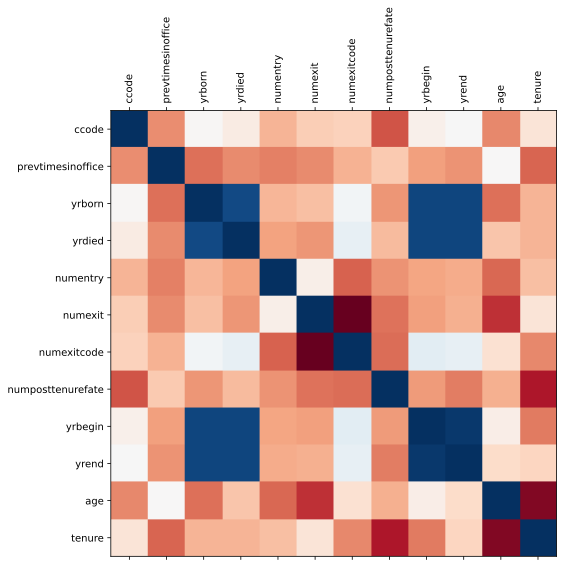

In [48]:
# Visualize the corelation between each column
fig = plt.figure(figsize =(8,8))
plt.matshow(corr, cmap='RdBu', fignum = fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation = 'vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

<AxesSubplot:xlabel='age', ylabel='tenure'>

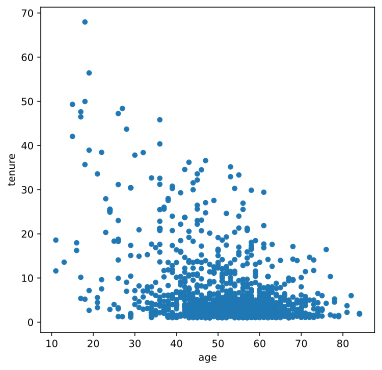

In [78]:
# the relationship between age and tenure
data.plot(kind = 'scatter', x = 'age', y = 'tenure', figsize = (6,6))

In [49]:
# Save the py file to excel
data.to_excel('data_all_leaders_group.xlsx', index = False)
# tranfert the .py file to excel

<font color='blue' size=2>Deal with the dataset with the name df1(Countries vs Democracy or Autocracy or Anocracy)</font> 

## Merge data from other sources

- Summary about data_leaders and data_deau
- Delete the simple column Democracy and Autocracy, we only need the Polity datasets IV category
- Combine data_deau and data_leader with key id = countries

In [50]:
# Import the data about countries grouped by three categories: Autocracy, Anocracy, Democracy
data_deau = pd.read_excel('DeorAu_group.xlsx')
data_leaders = pd.read_excel('data_all_leaders_group.xlsx')
# load another excel file mpd2020 with gdppc and pop
data_gdp = pd.read_excel('mpd2020.xlsx', 'Full data')

print(data_leaders.idacr.unique())

print(data_deau.idacr.unique())

In [52]:
print(data_leaders.columns)

print(data_leaders.shape)

print(data_deau.head())

#The types of each column
print(data_deau.dtypes)

Index(['obsid', 'leadid', 'ccode', 'idacr', 'leader', 'startdate', 'eindate',
       'enddate', 'eoutdate', 'entry', 'exit', 'exitcode', 'prevtimesinoffice',
       'posttenurefate', 'gender', 'yrborn', 'yrdied', 'borndate', 'deathdate',
       'dbpediauri', 'numentry', 'numexit', 'numexitcode', 'numposttenurefate',
       'fties', 'ftcur', 'yrbegin', 'yrend', 'age', 'tenure'],
      dtype='object')
(1425, 30)
        Country idacr  Democracy  Autocracy  \
0   Afghanistan   AFG          1          2   
1       Albania   ALB          9          0   
2       Algeria   DZA          3          1   
3        Angola   AGO          2          4   
4     Argentina   ARG          9          0   

   Polity datasets IV number[11][12] Polity datasets IV category  
0                                 -1                    Anocracy  
1                                  9                   Democracy  
2                                  2                    Anocracy  
3                                 -

Country                              object
idacr                                object
Democracy                             int64
Autocracy                             int64
Polity datasets IV number[11][12]     int64
Polity datasets IV category          object
dtype: object

In [53]:
#Delete the useless columns
data_deau = data_deau.drop(['Polity datasets IV number[11][12]', 'Democracy', 'Autocracy'], 1)
#print(data_deau)

#check the data
print(data_deau.columns)

#rename the Country-id to idacr in data_deau
data_deau = data_deau.rename({'Country-id': 'idacr'}, axis=1)

#combine data_deau with data_leader with key id=countries
#type(data_leaders)
#type(data_deau)
data_leaders_deau = pd.merge(data_leaders,data_deau, how ='left', on ='idacr')

print(data_leaders_deau.head())

print(data_leaders_deau.shape)

data_leaders_deau.to_csv('data_leaders_deau.csv')

C:\Users\my\AppData\Local\Temp/ipykernel_20444/2867843420.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_deau = data_deau.drop(['Polity datasets IV number[11][12]', 'Democracy', 'Autocracy'], 1)


In [57]:
#load another excel file mpd2020 with gdppc and pop
data_gdp = pd.read_excel('mpd2020.xlsx', 'Full data')

In [58]:
coun = data_gdp.countrycode.unique()
print(coun)
type(coun)
dir(coun)
np.sort(coun)
coun.shape

['AFG' 'AGO' 'ALB' 'ARE' 'ARG' 'ARM' 'AUS' 'AUT' 'AZE' 'BDI' 'BEL' 'BEN'
 'BFA' 'BGD' 'BGR' 'BHR' 'BIH' 'BLR' 'BOL' 'BRA' 'BRB' 'BWA' 'CAF' 'CAN'
 'CHE' 'CHL' 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CSK'
 'CUB' 'CYP' 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM' 'DZA' 'ECU' 'EGY' 'ESP'
 'EST' 'ETH' 'FIN' 'FRA' 'GAB' 'GBR' 'GEO' 'GHA' 'GIN' 'GMB' 'GNB' 'GNQ'
 'GRC' 'GTM' 'HKG' 'HND' 'HRV' 'HTI' 'HUN' 'IDN' 'IND' 'IRL' 'IRN' 'IRQ'
 'ISL' 'ISR' 'ITA' 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KOR' 'KWT'
 'LAO' 'LBN' 'LBR' 'LBY' 'LCA' 'LKA' 'LSO' 'LTU' 'LUX' 'LVA' 'MAR' 'MDA'
 'MDG' 'MEX' 'MKD' 'MLI' 'MLT' 'MMR' 'MNE' 'MNG' 'MOZ' 'MRT' 'MUS' 'MWI'
 'MYS' 'NAM' 'NER' 'NGA' 'NIC' 'NLD' 'NOR' 'NPL' 'NZL' 'OMN' 'PAK' 'PAN'
 'PER' 'PHL' 'POL' 'PRI' 'PRK' 'PRT' 'PRY' 'PSE' 'QAT' 'ROU' 'RUS' 'RWA'
 'SAU' 'SDN' 'SEN' 'SGP' 'SLE' 'SLV' 'SRB' 'STP' 'SUN' 'SVK' 'SVN' 'SWE'
 'SWZ' 'SYC' 'SYR' 'TCD' 'TGO' 'THA' 'TJK' 'TKM' 'TTO' 'TUN' 'TUR' 'TWN'
 'TZA' 'UGA' 'UKR' 'URY' 'USA' 'UZB' 'VEN' 'VNM' 'Y

(169,)

In [59]:
coun1 = data_leaders_deau.idacr.unique()
print(np.sort(coun1))
coun1.shape

['AFG' 'ALB' 'ALG' 'ANG' 'ARG' 'AUH' 'AUL' 'AUS' 'AZE' 'BAH' 'BAR' 'BAV'
 'BEL' 'BEN' 'BFO' 'BHM' 'BHU' 'BLZ' 'BNG' 'BOL' 'BOS' 'BOT' 'BRA' 'BUI'
 'BUL' 'CAM' 'CAN' 'CAO' 'CDI' 'CEN' 'CHA' 'CHL' 'CHN' 'COL' 'COM' 'CON'
 'COS' 'CRO' 'CUB' 'CYP' 'CZE' 'DEN' 'DJI' 'DOM' 'DRC' 'DRV' 'ECU' 'EGY'
 'EQG' 'EST' 'ETH' 'FIN' 'FJI' 'FRN' 'GAB' 'GDR' 'GFR' 'GHA' 'GMY' 'GNB'
 'GRC' 'GUA' 'GUI' 'GUY' 'HAI' 'HON' 'HUN' 'ICE' 'IND' 'INS' 'IRE' 'IRN'
 'IRQ' 'ISR' 'ITA' 'JAM' 'JOR' 'JPN' 'KEN' 'KOR' 'KUW' 'LAO' 'LAT' 'LBR'
 'LEB' 'LES' 'LIB' 'LIT' 'LUX' 'MAA' 'MAC' 'MAD' 'MAG' 'MAL' 'MAS' 'MAW'
 'MEX' 'MLI' 'MLT' 'MNG' 'MON' 'MOR' 'MYA' 'MZM' 'NEP' 'NEW' 'NIC' 'NIG'
 'NIR' 'NOR' 'NTH' 'OFS' 'OMA' 'PAK' 'PAN' 'PAR' 'PER' 'PHI' 'POL' 'POR'
 'PRK' 'ROK' 'RUM' 'RUS' 'RVN' 'RWA' 'SAF' 'SAL' 'SAU' 'SEN' 'SER' 'SIE'
 'SLV' 'SOL' 'SOM' 'SPN' 'SRI' 'SUD' 'SWA' 'SWD' 'SWZ' 'SYR' 'TAW' 'TAZ'
 'TBT' 'THI' 'TKM' 'TOG' 'TRA' 'TRI' 'TUN' 'TUR' 'UAE' 'UGA' 'UKG' 'URU'
 'USA' 'VEN' 'VNM' 'YEM' 'YPR' 'YUG' 'ZAM' 'ZIM']


(164,)

In [60]:
np.intersect1d(coun, coun1).shape

(69,)

In [61]:
np.setdiff1d(coun1, np.intersect1d(coun, coun1))

array(['ALG', 'ANG', 'AUH', 'AUL', 'BAH', 'BAR', 'BAV', 'BFO', 'BHM',
       'BHU', 'BLZ', 'BNG', 'BOS', 'BOT', 'BUI', 'BUL', 'CAM', 'CAO',
       'CDI', 'CEN', 'CHA', 'CON', 'COS', 'CRO', 'DEN', 'DRC', 'DRV',
       'EQG', 'FJI', 'FRN', 'GDR', 'GFR', 'GMY', 'GUA', 'GUI', 'GUY',
       'HAI', 'HON', 'ICE', 'INS', 'IRE', 'KUW', 'LAT', 'LEB', 'LES',
       'LIB', 'LIT', 'MAA', 'MAC', 'MAD', 'MAG', 'MAL', 'MAS', 'MAW',
       'MON', 'MOR', 'MYA', 'MZM', 'NEP', 'NEW', 'NIG', 'NIR', 'NTH',
       'OFS', 'OMA', 'PAR', 'PHI', 'POR', 'ROK', 'RUM', 'RVN', 'SAF',
       'SAL', 'SER', 'SIE', 'SOL', 'SOM', 'SPN', 'SRI', 'SUD', 'SWA',
       'SWD', 'TAW', 'TAZ', 'TBT', 'THI', 'TOG', 'TRA', 'TRI', 'UAE',
       'UKG', 'URU', 'YPR', 'ZAM', 'ZIM'], dtype=object)

In [62]:
np.setdiff1d(coun, np.intersect1d(coun, coun1))

array(['AGO', 'ARE', 'ARM', 'AUT', 'BDI', 'BFA', 'BGD', 'BGR', 'BHR',
       'BIH', 'BLR', 'BRB', 'BWA', 'CAF', 'CHE', 'CIV', 'CMR', 'COD',
       'COG', 'CPV', 'CRI', 'CSK', 'DEU', 'DMA', 'DNK', 'DZA', 'ESP',
       'FRA', 'GBR', 'GEO', 'GIN', 'GMB', 'GNQ', 'GTM', 'HKG', 'HND',
       'HRV', 'HTI', 'IDN', 'IRL', 'ISL', 'KAZ', 'KGZ', 'KHM', 'KWT',
       'LBN', 'LBY', 'LCA', 'LKA', 'LSO', 'LTU', 'LVA', 'MAR', 'MDA',
       'MDG', 'MKD', 'MMR', 'MNE', 'MOZ', 'MRT', 'MUS', 'MWI', 'MYS',
       'NAM', 'NER', 'NGA', 'NLD', 'NPL', 'NZL', 'OMN', 'PHL', 'PRI',
       'PRT', 'PRY', 'PSE', 'QAT', 'ROU', 'SDN', 'SGP', 'SLE', 'SRB',
       'STP', 'SUN', 'SVK', 'SVN', 'SWE', 'SYC', 'TCD', 'TGO', 'THA',
       'TJK', 'TTO', 'TWN', 'TZA', 'UKR', 'URY', 'UZB', 'ZAF', 'ZMB',
       'ZWE'], dtype=object)

In [63]:
data_leaders_deau.to_csv(r'data_com1.csv', index = False)
data_gdp.to_csv(r'data_gdp.csv', index = False)
# tranfert the .py file to csv

In [64]:
code = pd.read_excel('Countrycode.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'Countrycode.xlsx'

In [65]:
code_3 = code.ISO3.unique()
print(code_3)
code_3.shape

NameError: name 'code' is not defined

In [66]:
np.intersect1d(coun, code_3).shape
np.setdiff1d(coun, np.intersect1d(coun, code_3))

NameError: name 'code_3' is not defined

In [67]:
np.intersect1d(coun1, code_3).shape
np.setdiff1d(coun1, np.intersect1d(coun1, code_3))

NameError: name 'code_3' is not defined

In [68]:
country = data_leaders_deau.idacr.unique()
print(country)
sorted(country)

['USA' 'CAN' 'BHM' 'CUB' 'HAI' 'DOM' 'JAM' 'TRI' 'BAR' 'MEX' 'BLZ' 'GUA'
 'HON' 'SAL' 'NIC' 'COS' 'PAN' 'COL' 'VEN' 'GUY' 'ECU' 'PER' 'BRA' 'BOL'
 'PAR' 'CHL' 'ARG' 'URU' 'UKG' 'IRE' 'NTH' 'BEL' 'LUX' 'FRN' 'SWZ' 'SPN'
 'POR' 'BAV' 'GMY' 'GFR' 'GDR' 'POL' 'AUH' 'AUS' 'HUN' 'CZE' 'ITA' 'MLT'
 'ALB' 'SER' 'MNG' 'MAC' 'CRO' 'YUG' 'BOS' 'SLV' 'GRC' 'CYP' 'BUL' 'RUM'
 'RUS' 'EST' 'LAT' 'LIT' 'AZE' 'FIN' 'SWD' 'NOR' 'DEN' 'ICE' 'GNB' 'EQG'
 'MLI' 'SEN' 'BEN' 'MAA' 'NIR' 'CDI' 'GUI' 'BFO' 'LBR' 'SIE' 'GHA' 'TOG'
 'CAO' 'NIG' 'GAB' 'CEN' 'CHA' 'CON' 'DRC' 'UGA' 'KEN' 'TAZ' 'BUI' 'RWA'
 'SOM' 'DJI' 'ETH' 'ANG' 'MZM' 'ZAM' 'ZIM' 'MAW' 'SAF' 'TRA' 'OFS' 'LES'
 'BOT' 'SWA' 'MAG' 'COM' 'MAS' 'MOR' 'ALG' 'TUN' 'LIB' 'SUD' 'IRN' 'TUR'
 'IRQ' 'EGY' 'SYR' 'LEB' 'JOR' 'ISR' 'SAU' 'YEM' 'YPR' 'KUW' 'BAH' 'UAE'
 'OMA' 'AFG' 'TKM' 'CHN' 'TBT' 'MON' 'TAW' 'KOR' 'PRK' 'ROK' 'JPN' 'IND'
 'BHU' 'PAK' 'BNG' 'MYA' 'SRI' 'MAD' 'NEP' 'THI' 'CAM' 'LAO' 'VNM' 'DRV'
 'RVN' 'MAL' 'PHI' 'INS' 'AUL' 'NEW' 'SOL' 'FJI']


['AFG',
 'ALB',
 'ALG',
 'ANG',
 'ARG',
 'AUH',
 'AUL',
 'AUS',
 'AZE',
 'BAH',
 'BAR',
 'BAV',
 'BEL',
 'BEN',
 'BFO',
 'BHM',
 'BHU',
 'BLZ',
 'BNG',
 'BOL',
 'BOS',
 'BOT',
 'BRA',
 'BUI',
 'BUL',
 'CAM',
 'CAN',
 'CAO',
 'CDI',
 'CEN',
 'CHA',
 'CHL',
 'CHN',
 'COL',
 'COM',
 'CON',
 'COS',
 'CRO',
 'CUB',
 'CYP',
 'CZE',
 'DEN',
 'DJI',
 'DOM',
 'DRC',
 'DRV',
 'ECU',
 'EGY',
 'EQG',
 'EST',
 'ETH',
 'FIN',
 'FJI',
 'FRN',
 'GAB',
 'GDR',
 'GFR',
 'GHA',
 'GMY',
 'GNB',
 'GRC',
 'GUA',
 'GUI',
 'GUY',
 'HAI',
 'HON',
 'HUN',
 'ICE',
 'IND',
 'INS',
 'IRE',
 'IRN',
 'IRQ',
 'ISR',
 'ITA',
 'JAM',
 'JOR',
 'JPN',
 'KEN',
 'KOR',
 'KUW',
 'LAO',
 'LAT',
 'LBR',
 'LEB',
 'LES',
 'LIB',
 'LIT',
 'LUX',
 'MAA',
 'MAC',
 'MAD',
 'MAG',
 'MAL',
 'MAS',
 'MAW',
 'MEX',
 'MLI',
 'MLT',
 'MNG',
 'MON',
 'MOR',
 'MYA',
 'MZM',
 'NEP',
 'NEW',
 'NIC',
 'NIG',
 'NIR',
 'NOR',
 'NTH',
 'OFS',
 'OMA',
 'PAK',
 'PAN',
 'PAR',
 'PER',
 'PHI',
 'POL',
 'POR',
 'PRK',
 'ROK',
 'RUM',
 'RUS',
 'RVN',


In [69]:
country1 = data_leaders.idacr.unique()
print(country1)
country1.shape

['USA' 'CAN' 'BHM' 'CUB' 'HAI' 'DOM' 'JAM' 'TRI' 'BAR' 'MEX' 'BLZ' 'GUA'
 'HON' 'SAL' 'NIC' 'COS' 'PAN' 'COL' 'VEN' 'GUY' 'ECU' 'PER' 'BRA' 'BOL'
 'PAR' 'CHL' 'ARG' 'URU' 'UKG' 'IRE' 'NTH' 'BEL' 'LUX' 'FRN' 'SWZ' 'SPN'
 'POR' 'BAV' 'GMY' 'GFR' 'GDR' 'POL' 'AUH' 'AUS' 'HUN' 'CZE' 'ITA' 'MLT'
 'ALB' 'SER' 'MNG' 'MAC' 'CRO' 'YUG' 'BOS' 'SLV' 'GRC' 'CYP' 'BUL' 'RUM'
 'RUS' 'EST' 'LAT' 'LIT' 'AZE' 'FIN' 'SWD' 'NOR' 'DEN' 'ICE' 'GNB' 'EQG'
 'MLI' 'SEN' 'BEN' 'MAA' 'NIR' 'CDI' 'GUI' 'BFO' 'LBR' 'SIE' 'GHA' 'TOG'
 'CAO' 'NIG' 'GAB' 'CEN' 'CHA' 'CON' 'DRC' 'UGA' 'KEN' 'TAZ' 'BUI' 'RWA'
 'SOM' 'DJI' 'ETH' 'ANG' 'MZM' 'ZAM' 'ZIM' 'MAW' 'SAF' 'TRA' 'OFS' 'LES'
 'BOT' 'SWA' 'MAG' 'COM' 'MAS' 'MOR' 'ALG' 'TUN' 'LIB' 'SUD' 'IRN' 'TUR'
 'IRQ' 'EGY' 'SYR' 'LEB' 'JOR' 'ISR' 'SAU' 'YEM' 'YPR' 'KUW' 'BAH' 'UAE'
 'OMA' 'AFG' 'TKM' 'CHN' 'TBT' 'MON' 'TAW' 'KOR' 'PRK' 'ROK' 'JPN' 'IND'
 'BHU' 'PAK' 'BNG' 'MYA' 'SRI' 'MAD' 'NEP' 'THI' 'CAM' 'LAO' 'VNM' 'DRV'
 'RVN' 'MAL' 'PHI' 'INS' 'AUL' 'NEW' 'SOL' 'FJI']


(164,)

In [70]:
array = ['BTN', 'ERI', 'FJI', 'GUY', 'PNG', 'SLB', 'SOM', 'SUR', 'TLS',
       'XKK']
data_leaders.loc[data_leaders['idacr'].isin(array)]

,obsid,leadid,ccode,idacr,leader,startdate,eindate,enddate,eoutdate,entry,...,numentry,numexit,numexitcode,numposttenurefate,fties,ftcur,yrbegin,yrend,age,tenure
303,GUY-1966,81f650f3-1e42-11e4-b4cd-db5882bf8def,110,GUY,Burnham,1966-05-26,1966-05-26,1985-08-06,1985-08-06,Regular,...,0,2.0,0,-777.0,NaN,NaN,1966,1985,43,19.198204
304,GUY-1985,81f650f4-1e42-11e4-b4cd-db5882bf8def,110,GUY,Hoyte,1985-08-06,1985-08-06,1992-10-09,1992-10-09,Regular,...,0,1.0,0,0.0,NaN,NaN,1985,1992,56,7.176054
305,GUY-1992,81f681c4-1e42-11e4-b4cd-db5882bf8def,110,GUY,Jagan Cheddi,1992-10-09,1992-10-09,1997-03-06,1997-03-06,Regular,...,0,2.0,0,-777.0,Husband of Janet Jagan%81f681c6-1e42-11e4-b4cd...,0.0,1992,1997,74,4.405292
306,GUY-1997-2,81f681c6-1e42-11e4-b4cd-db5882bf8def,110,GUY,Janet Jagan,1997-12-19,1997-12-19,1999-08-11,1999-08-11,Regular,...,0,2.1,0,0.0,Wife of Jagan Cheddi%81f681c4-1e42-11e4-b4cd-d...,1.0,1997,1999,77,1.642744
1030,SOM-1960,82332a5f-1e42-11e4-b4cd-db5882bf8def,520,SOM,Osman Daar,1960-07-01,1960-07-01,1967-07-10,1967-07-10,Regular,...,0,1.0,0,0.0,NaN,NaN,1960,1967,52,7.022731
1031,SOM-1967,82332a60-1e42-11e4-b4cd-db5882bf8def,520,SOM,Shermarke,1967-07-10,1967-07-10,1969-10-15,1969-10-15,Regular,...,0,3.0,11,3.0,NaN,NaN,1967,1969,48,2.266987
1032,SOM-1969,82332a61-1e42-11e4-b4cd-db5882bf8def,520,SOM,Siad Barre,1969-10-21,1969-10-21,1991-01-26,1991-01-26,Irregular,...,1,3.0,4,1.0,NaN,NaN,1969,1991,57,21.265324
1423,FJI-1970,824f965a-1e42-11e4-b4cd-db5882bf8def,950,FJI,Mara,1970-10-10,1970-10-10,1987-04-13,1987-04-13,Regular,...,0,1.0,0,0.0,NaN,NaN,1970,1987,50,16.506841
1424,FJI-1987-3,824f965a-1e42-11e4-b4cd-db5882bf8def,950,FJI,Mara,1987-12-05,1987-12-05,1992-06-02,1992-06-02,Regular,...,0,1.0,0,0.0,NaN,NaN,1987,1992,67,4.492905


In [71]:
data_gdp.shape

(21682, 5)

In [72]:
data_gdp.head()

,countrycode,country,year,gdppc,pop
0,AFG,Afghanistan,1820,NaN,3280.0
1,AFG,Afghanistan,1870,NaN,4207.0
2,AFG,Afghanistan,1913,NaN,5730.0
3,AFG,Afghanistan,1950,1156.0,8150.0
4,AFG,Afghanistan,1951,1170.0,8284.0


In [73]:
#Delete the useless columns
data_gdp = data_gdp.drop(['country'], 1)
print(data_gdp)

      countrycode  year      gdppc          pop
0             AFG  1820        NaN   3280.00000
1             AFG  1870        NaN   4207.00000
2             AFG  1913        NaN   5730.00000
3             AFG  1950  1156.0000   8150.00000
4             AFG  1951  1170.0000   8284.00000
...           ...   ...        ...          ...
21677         ZWE  2014  1594.0000  13313.99205
21678         ZWE  2015  1560.0000  13479.13812
21679         ZWE  2016  1534.0000  13664.79457
21680         ZWE  2017  1582.3662  13870.26413
21681         ZWE  2018  1611.4052  14096.61179

[21682 rows x 4 columns]


C:\Users\my\AppData\Local\Temp/ipykernel_20444/591508188.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_gdp = data_gdp.drop(['country'], 1)


In [74]:
#rename the countrycode to idacr in data3
data_gdp = data_gdp.rename({'countrycode': 'idacr'}, axis=1)

In [75]:
data_gdp.head()

,idacr,year,gdppc,pop
0,AFG,1820,NaN,3280.0
1,AFG,1870,NaN,4207.0
2,AFG,1913,NaN,5730.0
3,AFG,1950,1156.0,8150.0
4,AFG,1951,1170.0,8284.0


In [76]:
#rename the year in gdppc to yrend to merge data
data_gdp = data_gdp.rename({'year': 'yrend'}, axis=1)

In [77]:
data_gdp.dtypes

idacr     object
yrend      int64
gdppc    float64
pop      float64
dtype: object

In [78]:
data_leaders_deau.dtypes

obsid                                  object
leadid                                 object
ccode                                   int64
idacr                                  object
leader                                 object
startdate                      datetime64[ns]
eindate                        datetime64[ns]
enddate                        datetime64[ns]
eoutdate                       datetime64[ns]
entry                                  object
exit                                   object
exitcode                               object
prevtimesinoffice                       int64
posttenurefate                         object
gender                                 object
yrborn                                  int64
yrdied                                  int64
borndate                               object
deathdate                              object
dbpediauri                             object
numentry                                int64
numexit                           

In [79]:
#change the float to int
data_leaders_deau['yrend'] = data_leaders_deau['yrend'].fillna(0.0).astype(int)
data_leaders_deau['yrbegin'] = data_leaders_deau['yrbegin'].fillna(0.0).astype(int)

In [80]:
data_leaders_deau.to_csv(r'data_leaders_deau.csv', index = False)
# tranfert the .py file to csv

In [81]:
data_leaders_deau = pd.read_csv(r'data_leaders_deau.csv')

In [82]:
data_leaders_deau.shape

(1425, 32)

In [83]:
data_leaders_deau.describe

<bound method NDFrame.describe of            obsid                                leadid  ccode idacr  \
0       USA-1869  81dcc176-1e42-11e4-b4cd-db5882bf8def      2   USA   
1       USA-1877  81dcc177-1e42-11e4-b4cd-db5882bf8def      2   USA   
2     USA-1881-2  81dcf24b-1e42-11e4-b4cd-db5882bf8def      2   USA   
3       USA-1885  34fb1558-3bbd-11e5-afeb-eb6f07f9fec7      2   USA   
4       USA-1889  81dcf24d-1e42-11e4-b4cd-db5882bf8def      2   USA   
...          ...                                   ...    ...   ...   
1420    SOL-1989  824f6586-1e42-11e4-b4cd-db5882bf8def    940   SOL   
1421    SOL-1994  824f6586-1e42-11e4-b4cd-db5882bf8def    940   SOL   
1422    SOL-1997  824f9657-1e42-11e4-b4cd-db5882bf8def    940   SOL   
1423    FJI-1970  824f965a-1e42-11e4-b4cd-db5882bf8def    950   FJI   
1424  FJI-1987-3  824f965a-1e42-11e4-b4cd-db5882bf8def    950   FJI   

         leader   startdate     eindate     enddate    eoutdate      entry  \
0         Grant  1869-03-04  1869-0

In [84]:
data_gdp.head()

,idacr,yrend,gdppc,pop
0,AFG,1820,NaN,3280.0
1,AFG,1870,NaN,4207.0
2,AFG,1913,NaN,5730.0
3,AFG,1950,1156.0,8150.0
4,AFG,1951,1170.0,8284.0


In [85]:
data_gdp.shape

(21682, 4)

In [86]:
data_gdp.dropna(subset = ["gdppc"], inplace=True)

In [87]:
data_gdp.shape

(19706, 4)

In [88]:
nan_values = data_gdp.isna()
nan_columns = nan_values.any()

columns_with_nan = data_gdp.columns[nan_columns].tolist()
print(columns_with_nan)

['pop']


In [89]:
data_gdp.to_csv(r'data_gdp.csv', index = False)
# tranfert the .py file to csv

In [90]:
data_gdp = pd.read_csv(r'data_gdp.csv')

In [91]:
#combine data_leaders_deau with data_gdp with key idacr and year
#type(data_leader)
#type(data_deau)
data_leaders_deau_gdp = pd.merge(data_leaders_deau, data_gdp, how ='left', on =['idacr', 'yrend'])

In [92]:
data_leaders_deau_gdp.shape

(1425, 34)

In [93]:
#check the columns with nan
nan_values = data_leaders_deau_gdp.isna()
nan_columns = nan_values.any()

columns_with_nan = data_leaders_deau_gdp.columns[nan_columns].tolist()
print(columns_with_nan)

['borndate', 'deathdate', 'dbpediauri', 'fties', 'ftcur', 'Country', 'Polity datasets IV category', 'gdppc', 'pop']


In [94]:
data_leaders_deau_gdp.to_csv(r'data_leaders_deau_gdp.csv', index = False)

In [95]:
data_leaders_deau_gdp.head()

,obsid,leadid,ccode,idacr,leader,startdate,eindate,enddate,eoutdate,entry,...,fties,ftcur,yrbegin,yrend,age,tenure,Country,Polity datasets IV category,gdppc,pop
0,USA-1869,81dcc176-1e42-11e4-b4cd-db5882bf8def,2,USA,Grant,1869-03-04,1869-03-04,1877-03-04,1877-03-04,Regular,...,NaN,NaN,1869,1877,47,8.000164,United States,Democracy,5098.6896,47325.0
1,USA-1877,81dcc177-1e42-11e4-b4cd-db5882bf8def,2,USA,Hayes,1877-03-04,1877-03-04,1881-03-04,1881-03-04,Regular,...,NaN,NaN,1877,1881,55,4.000082,United States,Democracy,6317.4384,51743.0
2,USA-1881-2,81dcf24b-1e42-11e4-b4cd-db5882bf8def,2,USA,Arthur,1881-09-19,1881-09-19,1885-03-04,1885-03-04,Regular,...,NaN,NaN,1881,1885,52,3.455239,United States,Democracy,6424.1432,56879.0
3,USA-1885,34fb1558-3bbd-11e5-afeb-eb6f07f9fec7,2,USA,Cleveland,1885-03-04,1885-03-04,1889-03-04,1889-03-04,Regular,...,NaN,NaN,1885,1889,48,4.000082,United States,Democracy,6705.6896,62016.0
4,USA-1889,81dcf24d-1e42-11e4-b4cd-db5882bf8def,2,USA,Harrison,1889-03-04,1889-03-04,1893-03-04,1893-03-04,Regular,...,NaN,NaN,1889,1893,56,4.000082,United States,Democracy,6834.2496,67231.0


In [96]:
#drop the nan data in gdppc
data_leaders_deau_gdp.dropna(subset = ['gdppc'], inplace=True)

In [97]:
data_leaders_deau_gdp.shape

(650, 34)

In [98]:
#rename the gdppc to end_gdppc in data_leaders_deau_gdp
data_leaders_deau_gdp = data_leaders_deau_gdp.rename({'gdppc': 'end_gdppc'}, axis=1)

In [99]:
data_leaders_deau_gdp.to_csv(r'data_leaders_deau_gdp.csv', index = False)

In [100]:
data_gdp = data_gdp.rename({'yrend': 'yrbegin'}, axis=1)

In [101]:
data_gdp.to_excel(r'data_gdp.xlsx', index = False)

In [102]:
data_leaders_deau_gdp = pd.read_csv('data_leaders_deau_gdp.csv')
data_gdp = pd.read_excel('data_gdp.xlsx')

In [103]:
data_gdp.head()

,idacr,yrbegin,gdppc,pop
0,AFG,1950,1156.0,8150.0
1,AFG,1951,1170.0,8284.0
2,AFG,1952,1189.0,8425.0
3,AFG,1953,1240.0,8573.0
4,AFG,1954,1245.0,8728.0


In [104]:
data_all = pd.merge(data_leaders_deau_gdp, data_gdp, how ='left', on =['idacr', 'yrbegin'])

In [105]:
data_all.head()

,obsid,leadid,ccode,idacr,leader,startdate,eindate,enddate,eoutdate,entry,...,yrbegin,yrend,age,tenure,Country,Polity datasets IV category,end_gdppc,pop_x,gdppc,pop_y
0,USA-1869,81dcc176-1e42-11e4-b4cd-db5882bf8def,2,USA,Grant,1869-03-04,1869-03-04,1877-03-04,1877-03-04,Regular,...,1869,1877,47,8.000164,United States,Democracy,5098.6896,47325.0,4943.1320,39385.0
1,USA-1877,81dcc177-1e42-11e4-b4cd-db5882bf8def,2,USA,Hayes,1877-03-04,1877-03-04,1881-03-04,1881-03-04,Regular,...,1877,1881,55,4.000082,United States,Democracy,6317.4384,51743.0,5098.6896,47325.0
2,USA-1881-2,81dcf24b-1e42-11e4-b4cd-db5882bf8def,2,USA,Arthur,1881-09-19,1881-09-19,1885-03-04,1885-03-04,Regular,...,1881,1885,52,3.455239,United States,Democracy,6424.1432,56879.0,6317.4384,51743.0
3,USA-1885,34fb1558-3bbd-11e5-afeb-eb6f07f9fec7,2,USA,Cleveland,1885-03-04,1885-03-04,1889-03-04,1889-03-04,Regular,...,1885,1889,48,4.000082,United States,Democracy,6705.6896,62016.0,6424.1432,56879.0
4,USA-1889,81dcf24d-1e42-11e4-b4cd-db5882bf8def,2,USA,Harrison,1889-03-04,1889-03-04,1893-03-04,1893-03-04,Regular,...,1889,1893,56,4.000082,United States,Democracy,6834.2496,67231.0,6705.6896,62016.0


In [116]:
#rename the gdppc to begin_gdppc in data_com3
data_all = data_leaders_deau_gdp.rename({'gdppc': 'begin_gdppc'}, axis=1)

In [117]:
# calulate the growth rate
data_all['growth_rate'] = (data_all['end_gdppc']/ data_all['begin_gdppc'] - 1) / data_all['tenure']

KeyError: 'begin_gdppc'

In [256]:
data_all.describe()

,ccode,prevtimesinoffice,yrborn,yrdied,numentry,numexit,numexitcode,numposttenurefate,ftcur,yrbegin,yrend,age,tenure,gdppc_x,pop_x,gdppc_y,pop_y
count,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,159.000000,1425.000000,1425.000000,1425.000000,1425.000000,650.000000,6.280000e+02,618.000000,594.000000
mean,352.120000,0.280702,1883.223158,1955.098246,0.211930,1.712561,-68.974035,-112.484000,0.371069,1935.806316,1942.162105,52.583158,6.347877,5803.958446,3.539112e+04,5347.761385,31360.299154
std,257.524833,0.670254,33.635365,35.838024,0.445008,0.925552,257.104687,272.921735,0.484617,34.468278,34.662291,11.879793,7.532185,5818.372150,1.023522e+05,5273.292611,85508.829494
min,2.000000,0.000000,1797.000000,1875.000000,0.000000,1.000000,-999.000000,-777.000000,0.000000,1840.000000,1871.000000,11.000000,1.002074,600.175300,3.011010e+02,706.000000,252.000000
25%,135.000000,0.000000,1858.000000,1927.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1911.000000,1915.000000,46.000000,2.228656,2114.000000,3.564101e+03,2071.500000,3348.000000
50%,305.000000,0.000000,1885.000000,1959.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1938.000000,1945.000000,53.000000,4.000082,3708.500000,8.280500e+03,3584.000000,7691.973000
75%,564.000000,0.000000,1911.000000,1984.000000,0.000000,3.000000,0.000000,1.000000,1.000000,1963.000000,1971.000000,61.000000,6.417654,7033.000000,3.013283e+04,6441.500000,28763.250000
max,950.000000,6.000000,1962.000000,2014.000000,2.000000,4.000000,111.000000,3.100000,1.000000,2012.000000,2014.000000,86.000000,67.968541,36756.000000,1.227453e+06,32784.158200,981235.000000


In [284]:
data_all.dropna(subset = ['growth_rate'], inplace=True)

KeyError: ['growth_rate']

In [172]:
data_all.shape

(1087, 37)

In [177]:
data_all.dropna(subset = ['leader'], inplace=True)

In [283]:
data_all.shape

(1425, 38)

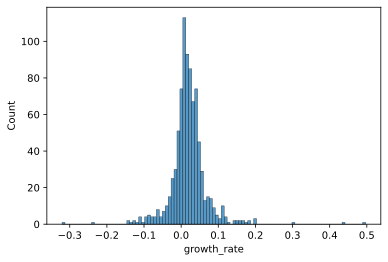

In [179]:
import seaborn as sns
ax= sns.histplot(data_com3['growth_rate'])

In [180]:
data_com3.to_csv(r'/Users/zhaoshuai/Desktop/DA/Data/Data-2016/data_com3.csv', index = False)

In [616]:
import pandas as pd
data = pd.read_csv('/Users/zhaoshuai/Desktop/DA/Data/Data-2016/data_allvar.csv')

In [617]:
data.dtypes

obsid                           object
ccode                            int64
idacr                           object
leader                          object
startdate                       object
eindate                         object
enddate                         object
eoutdate                        object
entry                           object
exit                            object
exitcode                        object
prevtimesinoffice                int64
posttenurefate                  object
gender                           int64
yrborn                           int64
yrdied                           int64
borndate                        object
deathdate                       object
numentry                         int64
numexit                        float64
numexitcode                      int64
numposttenurefate              float64
fties                           object
ftcur                          float64
yrbegin                          int64
yrend                    

In [624]:
new = data.groupby(['fties']).count()
new.to_csv(r'/Users/zhaoshuai/Desktop/DA/Data/Data-2016/fties.csv', index = False)

In [618]:
data.describe()

,ccode,prevtimesinoffice,gender,yrborn,yrdied,numentry,numexit,numexitcode,numposttenurefate,ftcur,yrbegin,yrend,age,tenure,end_gdppc,pop_x,begin_gdppc,pop_y,growth_rate,fties_range
count,851.000000,851.000000,851.0,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,87.000000,851.000000,851.000000,851.000000,851.000000,851.000000,8.240000e+02,851.000000,823.000000,851.000000,851.000000
mean,340.427732,0.023502,2.0,1889.215041,1961.608696,0.183314,1.623854,-33.141011,-101.588484,0.333333,1942.520564,1948.150411,53.305523,5.631682,6245.394749,2.767412e+04,5600.378397,25118.107187,0.020065,0.112808
std,255.644777,0.173307,0.0,33.205273,34.627135,0.410743,0.883872,185.025318,262.377218,0.474137,32.600260,33.890425,10.386448,6.147512,6390.829690,7.858113e+04,5699.619817,68528.066517,0.050699,0.316545
min,2.000000,0.000000,2.0,1797.000000,1877.000000,0.000000,1.000000,-999.000000,-777.000000,0.000000,1858.000000,1871.000000,17.000000,1.002074,600.175300,1.510360e+02,572.000000,142.938000,-0.320763,0.000000
25%,135.000000,0.000000,2.0,1864.000000,1934.500000,0.000000,1.000000,0.000000,0.000000,0.000000,1919.000000,1922.000000,46.500000,2.197170,2137.000000,3.064100e+03,2032.500000,2836.283500,0.000869,0.000000
50%,235.000000,0.000000,2.0,1896.000000,1969.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1950.000000,1955.000000,53.000000,4.000082,4063.000000,7.210389e+03,3711.000000,6478.681000,0.017280,0.000000
75%,546.000000,0.000000,2.0,1915.500000,1990.000000,0.000000,2.100000,0.000000,0.000000,1.000000,1967.000000,1975.000000,60.000000,5.998754,7623.000000,2.418997e+04,6733.000000,21849.500000,0.038767,0.000000
max,920.000000,2.000000,2.0,1955.000000,2014.000000,2.000000,4.000000,111.000000,3.100000,1.000000,2012.000000,2014.000000,84.000000,49.966803,64925.671400,1.227453e+06,46031.000000,981235.000000,0.496841,1.000000


In [619]:
print(data['exitcode'])

0      Regular
1      Regular
2      Regular
3      Regular
4      Regular
        ...   
846    Regular
847    Regular
848    Regular
849    Regular
850    Regular
Name: exitcode, Length: 851, dtype: object


In [909]:
data = pd.read_csv('/Users/zhaoshuai/Desktop/DA/Data/Data-2016/data_com3.csv')

In [913]:
print(data['fties'].unique())

[nan
 'Uncle (distant) of Roosevelt, F.%81dd53f3-1e42-11e4-b4cd-db5882bf8def'
 'Nephew (distant) of Roosevelt, T.%81dd231e-1e42-11e4-b4cd-db5882bf8def'
 'Father of Ramon Baez%81e1556e-1e42-11e4-b4cd-db5882bf8def'
 'Father of Justin Trudeau%43f5ae9c-de6a-11e5-ba44-bb6d7c1a9a58'
 'Father of Gomez y Arias%81df3c45-1e42-11e4-b4cd-db5882bf8def'
 'Father of Duvalier, Jean-Claude%81e06149-1e42-11e4-b4cd-db5882bf8def'
 'Son of Chamorro%81e8c5e3-1e42-11e4-b4cd-db5882bf8def'
 'Son of Sacasa%81e8f6b5-1e42-11e4-b4cd-db5882bf8def'
 'Relative of Guerrero Gutierrez%81e9ba0c-1e42-11e4-b4cd-db5882bf8def'
 'Father of Calderon Fournier%81ec34db-1e42-11e4-b4cd-db5882bf8def'
 'Brother of Arosomena, Juan%81f24f7a-1e42-11e4-b4cd-db5882bf8def'
 'Brother of Florencio Harmodio Arosemena%81f21ea5-1e42-11e4-b4cd-db5882bf8def'
 'Brother of Arias, H.%81f24f78-1e42-11e4-b4cd-db5882bf8def'
 'Father of Martin Torrijos%81f3747b-1e42-11e4-b4cd-db5882bf8def'
 'Father of Lopez Michelsen%81f49975-1e42-11e4-b4cd-db5882bf8de

In [780]:
data.drop([  
'end_gdppc'
], axis=1, inplace=True)

In [903]:
data.dtypes

ccode                float64
leader                object
entry                float64
exit                 float64
exitcode             float64
prevtimesinoffice    float64
posttenurefate       float64
gender               float64
yrborn               float64
yrdied               float64
numentry             float64
numexit              float64
yrbegin              float64
yrend                float64
age                  float64
tenure               float64
pop_x                float64
begin_gdppc          float64
pop_y                float64
growth_rate          float64
fties_range          float64
dtype: object

In [782]:
import numpy as np
data['fties_range'] = np.where(data['fties'].isnull(), 0.5, 1)
data['gender'] = np.where(data['gender']=='M', 0.5, 1)
#data['logarithm_gdppc'] = np.log(data['gdppc'])
#data['normal_tenure'] = (data['tenure'] - data['tenure'].mean()) / data['tenure'].std()#normalize tenure with z-score

In [904]:
corr= data.corr()
corr

,ccode,entry,exit,exitcode,prevtimesinoffice,posttenurefate,gender,yrborn,yrdied,numentry,numexit,yrbegin,yrend,age,tenure,pop_x,begin_gdppc,pop_y,growth_rate,fties_range
ccode,1.000000,0.063653,0.162967,-0.048272,-0.023541,-0.068475,0.126609,0.302965,0.276797,0.063653,0.118559,0.325234,0.340024,0.052247,0.149956,0.160273,0.060113,0.155944,0.090715,0.040575
entry,0.063653,1.000000,0.070978,0.231806,-0.011012,-0.188908,0.003125,0.149008,0.096534,1.000000,0.236493,0.100669,0.105943,-0.160404,0.049947,-0.061864,-0.215279,-0.071774,-0.006677,0.003636
exit,0.162967,0.070978,1.000000,0.137437,-0.044495,-0.364575,-0.047816,0.125202,0.016818,0.070978,0.562360,0.112572,0.150645,-0.046934,0.233013,0.030604,-0.046577,0.020110,0.000232,0.055956
exitcode,-0.048272,0.231806,0.137437,1.000000,-0.017598,-0.381549,-0.025615,-0.059839,-0.100760,0.231806,0.606308,-0.114898,-0.112813,-0.169329,-0.011500,-0.090913,-0.155749,-0.093870,-0.158151,-0.021385
prevtimesinoffice,-0.023541,-0.011012,-0.044495,-0.017598,1.000000,0.051637,-0.010431,-0.161771,-0.134323,-0.011012,-0.065106,-0.122525,-0.124190,0.132604,-0.030927,-0.030240,-0.019123,-0.030551,-0.007227,-0.048384
posttenurefate,-0.068475,-0.188908,-0.364575,-0.381549,0.051637,1.000000,0.027017,-0.151274,-0.031167,-0.188908,-0.718399,-0.070612,-0.103252,0.261985,-0.193913,0.032819,0.221714,0.047101,0.037467,-0.076779
gender,0.126609,0.003125,-0.047816,-0.025615,-0.010431,0.027017,1.000000,0.079192,0.075510,0.003125,-0.054294,0.073806,0.071383,-0.021519,0.002264,0.137839,-0.018381,0.125512,0.005060,0.166993
yrborn,0.302965,0.149008,0.125202,-0.059839,-0.161771,-0.151274,0.079192,1.000000,0.928597,0.149008,0.168664,0.950341,0.949527,-0.214117,0.194485,0.097544,0.253739,0.093423,0.092928,0.060593
yrdied,0.276797,0.096534,0.016818,-0.100760,-0.134323,-0.031167,0.075510,0.928597,1.000000,0.096534,0.058318,0.939826,0.941601,-0.018846,0.206665,0.116635,0.294479,0.113522,0.099988,0.047823
numentry,0.063653,1.000000,0.070978,0.231806,-0.011012,-0.188908,0.003125,0.149008,0.096534,1.000000,0.236493,0.100669,0.105943,-0.160404,0.049947,-0.061864,-0.215279,-0.071774,-0.006677,0.003636


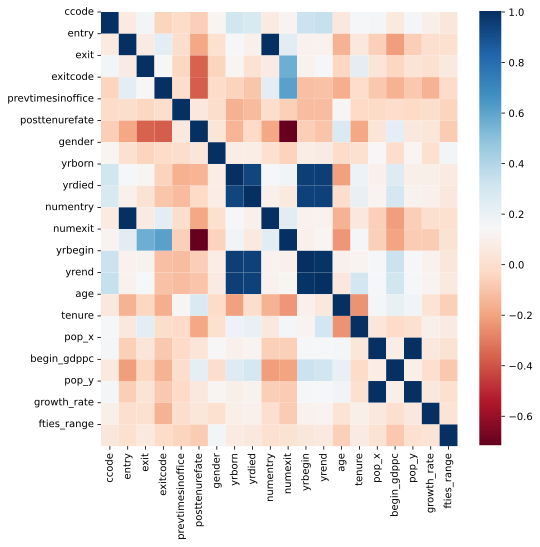

In [908]:
#visualize the corelation between each column
fig = plt.figure(figsize =(8,8))
#plt.matshow(corr, cmap='RdBu', fignum = fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation = 'vertical');
sns.heatmap(corr, cmap='RdBu')
plt.yticks(range(len(corr.columns)), corr.columns)
fig.savefig('heatmap.png',dpi=600)

In [785]:
data.describe()

,ccode,prevtimesinoffice,gender,yrborn,yrdied,numentry,numexit,numexitcode,numposttenurefate,ftcur,yrbegin,yrend,age,tenure,pop_x,begin_gdppc,pop_y,growth_rate,fties_range
count,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,87.000000,851.000000,851.000000,851.000000,851.000000,8.240000e+02,851.000000,823.000000,851.000000,851.000000
mean,340.427732,0.023502,0.502938,1889.215041,1961.608696,0.183314,1.623854,-33.141011,-101.588484,0.333333,1942.520564,1948.150411,53.305523,5.631682,2.767412e+04,5600.378397,25118.107187,0.020065,0.556404
std,255.644777,0.173307,0.038235,33.205273,34.627135,0.410743,0.883872,185.025318,262.377218,0.474137,32.600260,33.890425,10.386448,6.147512,7.858113e+04,5699.619817,68528.066517,0.050699,0.158272
min,2.000000,0.000000,0.500000,1797.000000,1877.000000,0.000000,1.000000,-999.000000,-777.000000,0.000000,1858.000000,1871.000000,17.000000,1.002074,1.510360e+02,572.000000,142.938000,-0.320763,0.500000
25%,135.000000,0.000000,0.500000,1864.000000,1934.500000,0.000000,1.000000,0.000000,0.000000,0.000000,1919.000000,1922.000000,46.500000,2.197170,3.064100e+03,2032.500000,2836.283500,0.000869,0.500000
50%,235.000000,0.000000,0.500000,1896.000000,1969.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1950.000000,1955.000000,53.000000,4.000082,7.210389e+03,3711.000000,6478.681000,0.017280,0.500000
75%,546.000000,0.000000,0.500000,1915.500000,1990.000000,0.000000,2.100000,0.000000,0.000000,1.000000,1967.000000,1975.000000,60.000000,5.998754,2.418997e+04,6733.000000,21849.500000,0.038767,0.500000
max,920.000000,2.000000,1.000000,1955.000000,2014.000000,2.000000,4.000000,111.000000,3.100000,1.000000,2012.000000,2014.000000,84.000000,49.966803,1.227453e+06,46031.000000,981235.000000,0.496841,1.000000


In [786]:
data.to_csv('/Users/zhaoshuai/Desktop/DA/Data/Data-2016/data_com3_new.csv')

In [787]:
data.drop([  
'obsid',
'idacr',
'country_x',
'country_y',
'Country',
'startdate',
'eindate',
'enddate',
'eoutdate',
'borndate',
'deathdate'
#'numexitcode',
#'numposttenurefate',
#'numexit',
#'exit',
#'entry',
#'prevtimesinoffice',
#'posttenurefate',
#'exitcode',
], axis=1, inplace=True)

In [788]:
null_sum=data.isnull().sum()
data.columns[null_sum<len(data)*0.3] # columns will keep

Index(['ccode', 'leader', 'entry', 'exit', 'exitcode', 'prevtimesinoffice',
       'posttenurefate', 'gender', 'yrborn', 'yrdied', 'numentry', 'numexit',
       'numexitcode', 'numposttenurefate', 'yrbegin', 'yrend', 'age', 'tenure',
       'pop_x', 'begin_gdppc', 'pop_y', 'growth_rate', 'fties_range'],
      dtype='object')

In [789]:
#drop the columns that at least 30% values are null
data.drop(columns=data.columns[null_sum > len(data)*0.3], inplace=True)

In [817]:
data.dtypes

ccode                float64
leader                object
entry                float64
exit                 float64
exitcode             float64
prevtimesinoffice    float64
posttenurefate       float64
gender               float64
yrborn               float64
yrdied               float64
numentry             float64
numexit              float64
numexitcode            int64
numposttenurefate    float64
yrbegin              float64
yrend                float64
age                  float64
tenure               float64
pop_x                float64
begin_gdppc          float64
pop_y                float64
growth_rate          float64
fties_range          float64
dtype: object

Normalization

In [791]:
#ccode int
min, max = data['ccode'].min(), data['ccode'].max()
data['ccode'] = (data['ccode']-min)/(max-min)

In [792]:
#entry, regular 1...
data['entry'] = data['entry'].replace({'Regular': 1,'Irregular': 2, 'Foreign Imposition': 3})
data['entry']=data['entry'].astype(float, errors='raise')
min, max = data['entry'].min(), data['entry'].max()
data['entry']= (data['entry']-min)/(max-min)

In [793]:
#exit, regular 1...
data['exit'] = data['exit'].replace({'Regular': 1, 'Irregular': 2, 'Foreign': 3,'Natural Death': 4, 
                                    'Retired Due to Ill Health': 5, 'Suicide': 6}) 
data['exit']=data['exit'].astype(float, errors='raise')
min, max = data['exit'].min(), data['exit'].max()
data['exit']= (data['exit']-min)/(max-min)

In [795]:
#exitcode, regular 1...
data['exitcode'] = data['exitcode'].replace({'Assassination by Unsupported Individual': 1,'Irregular, Other': 2,
                                             'Popular Protest, with Foreign Support': 3, 
                                             'Popular Protest, without Foreign Support': 4,
                                             'Regular': 5, 'Removed by Military, with Foreign Support': 6,
                                             'Removed by Military, without Foreign Support': 7, 
                                             'Removed by Other Government Actors, with Foreign Support': 8,
                                             'Removed by Other Government Actors, without Foreign Support': 9,
                                             'Removed by Rebels, with Foreign Support': 10,
                                             'Removed by Rebels, without Foreign Support': 11,
                                             'Removed in Military Power Struggle Short of Coup': 12,
                                             'Removed through Threat of Foreign Force': 13, 'Unknown':14}) 
data['exitcode']=data['exitcode'].astype(float, errors='raise')
min, max = data['exitcode'].min(), data['exitcode'].max()
data['exitcode']= (data['exitcode']-min)/(max-min)

In [820]:
data.dtypes

ccode                float64
leader                object
entry                float64
exit                 float64
exitcode             float64
prevtimesinoffice    float64
posttenurefate       float64
gender               float64
yrborn               float64
yrdied               float64
numentry             float64
numexit              float64
yrbegin              float64
yrend                float64
age                  float64
tenure               float64
pop_x                float64
begin_gdppc          float64
pop_y                float64
growth_rate          float64
fties_range          float64
dtype: object

In [797]:
#posttenurefate
data['posttenurefate'] = data['posttenurefate'].replace({'Death': 1, 'Exile': 2, 'Imprisonment': 3, 
                                     'Missing: Natural Death within Six Months of Losing Office': 4,
                                     'Missing: No Information Found': 5, 'OK': 6, 'Suicide': 7}) 
data['posttenurefate']=data['posttenurefate'].astype(float, errors='raise')
min, max = data['posttenurefate'].min(), data['posttenurefate'].max()
data['posttenurefate']= (data['posttenurefate']-min)/(max-min)

In [798]:
#prevtimesinoffice
min, max = data['prevtimesinoffice'].min(), data['prevtimesinoffice'].max()
data['prevtimesinoffice']= (data['prevtimesinoffice']-min)/(max-min)

In [799]:
#yrborn
min, max = data['yrborn'].min(), data['yrborn'].max()
data['yrborn']= (data['yrborn']-min)/(max-min)

In [800]:
#yrdied
min, max = data['yrdied'].min(), data['yrdied'].max()
data['yrdied']= (data['yrdied']-min)/(max-min)

In [801]:
#numentry
min, max = data['numentry'].min(), data['numentry'].max()
data['numentry']= (data['numentry']-min)/(max-min)

In [802]:
#numexit
min, max = data['numexit'].min(), data['numexit'].max()
data['numexit']= (data['numexit']-min)/(max-min)

In [818]:
#delete numexitcode, numposttenurefate
data.drop([  
'numexitcode',
'numposttenurefate',
    'fties',
    'ftcur',
    'Polity datasets IV category'
], axis=1, inplace=True)

In [804]:
#yrbegin
min, max = data['yrbegin'].min(), data['yrbegin'].max()
data['yrbegin']= (data['yrbegin']-min)/(max-min)

In [805]:
#yrend
min, max = data['yrend'].min(), data['yrend'].max()
data['yrend']= (data['yrend']-min)/(max-min)

In [806]:
#age
min, max = data['age'].min(), data['age'].max()
data['age']= (data['age']-min)/(max-min)

In [807]:
#tenure
min, max = data['tenure'].min(), data['tenure'].max()
data['tenure']= (data['tenure']-min)/(max-min)

In [808]:
#end_gdppc
min, max = data['end_gdppc'].min(), data['end_gdppc'].max()
data['end_gdppc']= (data['end_gdppc']-min)/(max-min)

KeyError: 'end_gdppc'

In [809]:
#pop_x
min, max = data['pop_x'].min(), data['pop_x'].max()
data['pop_x']= (data['pop_x']-min)/(max-min)

In [810]:
#begin_gdppc
min, max = data['begin_gdppc'].min(), data['begin_gdppc'].max()
data['begin_gdppc']= (data['begin_gdppc']-min)/(max-min)

In [811]:
#pop_y
min, max = data['pop_y'].min(), data['pop_y'].max()
data['pop_y']= (data['pop_y']-min)/(max-min)

In [812]:
data.describe()

,ccode,entry,exit,exitcode,prevtimesinoffice,posttenurefate,gender,yrborn,yrdied,numentry,...,numposttenurefate,yrbegin,yrend,age,tenure,pop_x,begin_gdppc,pop_y,growth_rate,fties_range
count,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,...,851.000000,851.000000,851.000000,851.000000,851.000000,824.000000,851.000000,823.000000,851.000000,851.000000
mean,0.368658,0.091657,0.148061,0.364368,0.011751,0.632785,0.502938,0.583640,0.617582,0.091657,...,-101.588484,0.548835,0.539513,0.541873,0.094550,0.022426,0.110613,0.025456,0.020065,0.556404
std,0.278480,0.205371,0.238190,0.170195,0.086653,0.286278,0.038235,0.210160,0.252753,0.205371,...,262.377218,0.211690,0.236996,0.155022,0.125550,0.064028,0.125379,0.069849,0.050699,0.158272
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,-777.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.320763,0.500000
25%,0.144880,0.000000,0.000000,0.307692,0.000000,0.500000,0.500000,0.424051,0.419708,0.000000,...,0.000000,0.396104,0.356643,0.440299,0.024407,0.002374,0.032128,0.002745,0.000869,0.500000
50%,0.253813,0.000000,0.000000,0.307692,0.000000,0.833333,0.500000,0.626582,0.671533,0.000000,...,0.000000,0.597403,0.587413,0.537313,0.061228,0.005752,0.069051,0.006458,0.017280,0.500000
75%,0.592593,0.000000,0.200000,0.307692,0.000000,0.833333,0.500000,0.750000,0.824818,0.000000,...,0.000000,0.707792,0.727273,0.641791,0.102047,0.019587,0.135529,0.022125,0.038767,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.496841,1.000000


In [711]:
data.describe()

,ccode,entry,exit,exitcode,prevtimesinoffice,posttenurefate,yrborn,yrdied,numentry,numexit,ftcur,yrbegin,yrend,age,tenure,end_gdppc,pop_x,begin_gdppc,pop_y,growth_rate
count,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,87.000000,851.000000,851.000000,851.000000,851.000000,851.000000,824.000000,851.000000,823.000000,851.000000
mean,0.368658,0.091657,0.148061,0.364368,0.011751,0.632785,0.583640,0.617582,0.091657,0.207951,0.333333,0.548835,0.539513,0.541873,0.094550,0.087760,0.022426,0.110613,0.025456,0.020065
std,0.278480,0.205371,0.238190,0.170195,0.086653,0.286278,0.210160,0.252753,0.205371,0.294624,0.474137,0.211690,0.236996,0.155022,0.125550,0.099351,0.064028,0.125379,0.069849,0.050699
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.320763
25%,0.144880,0.000000,0.000000,0.307692,0.000000,0.500000,0.424051,0.419708,0.000000,0.000000,0.000000,0.396104,0.356643,0.440299,0.024407,0.023891,0.002374,0.032128,0.002745,0.000869
50%,0.253813,0.000000,0.000000,0.307692,0.000000,0.833333,0.626582,0.671533,0.000000,0.000000,0.000000,0.597403,0.587413,0.537313,0.061228,0.053833,0.005752,0.069051,0.006458,0.017280
75%,0.592593,0.000000,0.200000,0.307692,0.000000,0.833333,0.750000,0.824818,0.000000,0.366667,1.000000,0.707792,0.727273,0.641791,0.102047,0.109176,0.019587,0.135529,0.022125,0.038767
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.496841


In [813]:
data.dropna(subset = ['growth_rate'], inplace=True)

In [814]:
data.shape

(851, 23)

In [815]:
data.head()

,ccode,leader,entry,exit,exitcode,prevtimesinoffice,posttenurefate,gender,yrborn,yrdied,...,numposttenurefate,yrbegin,yrend,age,tenure,pop_x,begin_gdppc,pop_y,growth_rate,fties_range
0,0.0,Grant,0.0,0.0,0.307692,0.0,0.833333,0.5,0.158228,0.058394,...,0.0,0.071429,0.041958,0.447761,0.142921,0.038437,0.096155,0.039998,0.003934,0.5
1,0.0,Hayes,0.0,0.0,0.307692,0.0,0.833333,0.5,0.158228,0.116788,...,0.0,0.123377,0.069930,0.567164,0.061228,0.042037,0.099577,0.048091,0.059757,0.5
2,0.0,Arthur,0.0,0.0,0.307692,0.0,0.833333,0.5,0.202532,0.065693,...,0.0,0.149351,0.097902,0.522388,0.050101,0.046222,0.126387,0.052595,0.004888,0.5
3,0.0,Cleveland,0.0,0.0,0.307692,0.0,0.833333,0.5,0.253165,0.226277,...,0.0,0.175325,0.125874,0.462687,0.061228,0.050407,0.128735,0.057829,0.010956,0.5
4,0.0,Harrison,0.0,0.0,0.307692,0.0,0.833333,0.5,0.227848,0.175182,...,0.0,0.201299,0.153846,0.582090,0.061228,0.054656,0.134928,0.063066,0.004793,0.5


In [823]:
data.to_csv(r'/Users/zhaoshuai/Desktop/DA/Data/Data-2016/data_norm.csv', index = False)
# tranfert the .py file to excel/csv

In [896]:
import pandas as pd
data = pd.read_csv('/Users/zhaoshuai/Desktop/DA/Data/Data-2016/data_norm.csv')

#Look at the distribution of the data put into the model

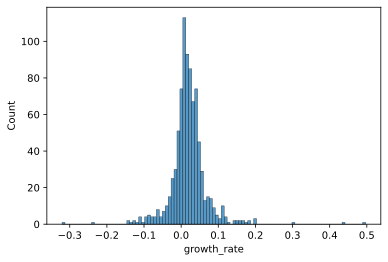

In [482]:
ax = sns.histplot(data['growth_rate'])

In [461]:
mean = data['growth_rate'].mean()
std = data['growth_rate'].std()
print(mean)
print(std)

0.02006547543370586
0.05069875369845421


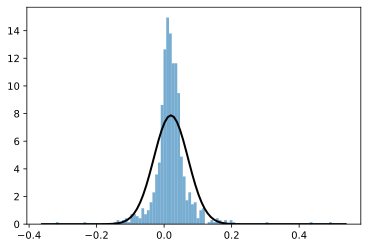

In [483]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Generate some data for this
# demonstration.
dta = data['growth_rate']

# Fit a normal distribution to
# the data:
# mean and standard deviation
mu, std = norm.fit(dta)

# Plot the histogram.
plt.hist(dta, bins=100, density=True, alpha=0.6)

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
#title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
#plt.title(title)

plt.show()


In [353]:
data['growth_rate'] = data['growth_rate']*10

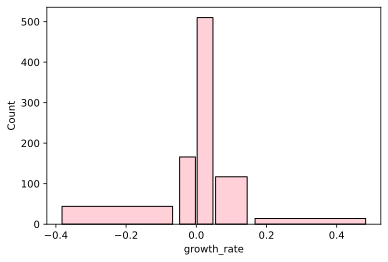

In [288]:
ax = sns.histplot(data.growth_rate,bins=[-0.4, -0.05, 0, 0.05, 0.15, 0.5], color ='pink', shrink=.9)

In [457]:
x = data['growth_rate']
y = np.histogram(data['growth_rate'])
print(x)
print(y)

0      0.003934
1      0.059757
2      0.004888
3      0.010956
4      0.004793
         ...   
846    0.015463
847    0.050256
848   -0.023953
849    0.010930
850    0.002954
Name: growth_rate, Length: 851, dtype: float64
(array([  1,   1,  24, 254, 524,  38,   6,   1,   0,   2]), array([-0.32076286, -0.2390025 , -0.15724214, -0.07548179,  0.00627857,
        0.08803893,  0.16979929,  0.25155965,  0.33332   ,  0.41508036,
        0.49684072]))


(array([ 0.14372346,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.14372346,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.14372346,  0.28744691,  0.14372346,  0.28744691,
         0.43117037,  0.14372346,  0.71861728,  0.71861728,  0.57489383,
         0.43117037,  1.14978765,  0.71861728,  1.0060642 ,  1.58095802,
         2.29957531,  3.59308642,  4.45542716,  8.6234074 , 12.64766419,
        14.9472395 , 13.79745184, 11.64159999, 11.64159999,  9.48574814,
         4.88659753,  3.44936296,  1.72468148,  2.29957531,  1.43723457,
         1.58095802,  0.43117037,  1.0060642 ,  1.14978765,  0.        ,
         0.14372346,  0.28744691,  0.14372346,  0.43117037,  0.28744691,
         0.14372346,  0.28744691,  0.        ,  0.28744691,  0.14372346,
         0.        ,  0.        ,  0.        ,  0. 

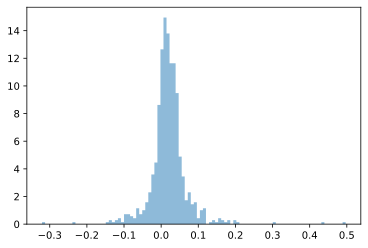

In [460]:
import matplotlib.pyplot as plt
plt.hist(data['growth_rate'], bins=100, density=True, alpha=0.5, histtype='stepfilled' )

In [845]:
#group growth_rate into seven groups according to the central limit theorem
mu, std = norm.fit(data['growth_rate'])
conditions = [
    (data['growth_rate'] < -mu-3*std),
    (data['growth_rate'] >= -mu-3*std) & (data['growth_rate'] < -mu-2*std),
    (data['growth_rate'] >= -mu-2*std) & (data['growth_rate'] < -mu-std),
    (data['growth_rate'] >= -mu-std) & (data['growth_rate'] < mu+std),
    (data['growth_rate'] >= mu+std) & (data['growth_rate'] < mu+2*std),
    (data['growth_rate'] >= mu+2*std) & (data['growth_rate'] < mu+3*std),
    (data['growth_rate'] >= mu+3*std)
]

values = [7, 6, 5, 4, 3, 2, 1]

data['growth_rate_normgroup'] = np.select(conditions, values)

In [528]:
#group growth_rate into seven groups according to min and max
min, max = data['growth_rate'].min(), data['growth_rate'].max()
conditions = [
    (data['growth_rate'] < min+1/7*(max-min)),
    (data['growth_rate'] >= min+1/7*(max-min)) & (data['growth_rate'] < min+2/7*(max-min)),
    (data['growth_rate'] >= min+2/7*(max-min)) & (data['growth_rate'] < min+3/7*(max-min)),
    (data['growth_rate'] >= min+3/7*(max-min)) & (data['growth_rate'] < min+4/7*(max-min)),
    (data['growth_rate'] >= min+4/7*(max-min)) & (data['growth_rate'] < min+5/7*(max-min)),
    (data['growth_rate'] >= min+5/7*(max-min)) & (data['growth_rate'] < min+6/7*(max-min)),
    (data['growth_rate'] >= min+6/7*(max-min))
]
    
values = [7, 6, 5, 4, 3, 2, 1]

data['growth_rate_avggrp'] = np.select(conditions, values)

In [870]:
#group growth_rate in desc
sorted_data = data.sort_values("growth_rate", ascending=False)

In [871]:
print(sorted_data)

        ccode                leader  entry  exit  exitcode  prevtimesinoffice  \
670  0.673203                 Idris    0.0   0.2  0.461538                0.0   
404  0.237473             De Gaulle    0.0   0.0  0.307692                0.0   
819  0.912854                 Roxas    0.0   0.6  0.307692                0.0   
492  0.379085             Venizelos    1.0   0.0  0.307692                0.0   
702  0.716776           Elias Hrawi    0.0   0.0  0.307692                0.0   
..        ...                   ...    ...   ...       ...                ...   
305  0.177560  Jose Eugenio Ellauri    0.0   0.2  1.000000                0.0   
111  0.099129             Solorzano    0.0   0.2  0.461538                0.0   
403  0.237473                Petain    0.0   0.0  0.307692                0.0   
514  0.404139      Abulfaz Elchibey    0.5   0.2  0.769231                0.0   
202  0.144880               Pierola    0.5   0.4  1.000000                0.0   

     posttenurefate  gender

In [897]:
#group leaders into seven groups each group with approximately same leaders, the rest is placed in the last group
groups = range(1,8)
data['growth_rate_avggrp'] = np.concatenate(
                [np.repeat(groups,int(len(data)/7)), 
                 np.repeat([7],int(len(data)%7))])

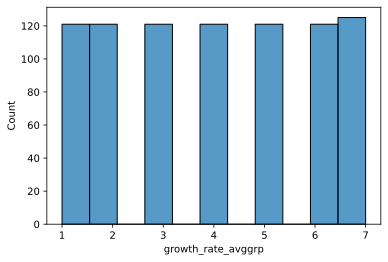

In [898]:
ax = sns.histplot(data['growth_rate_avggrp'])

In [899]:
print(data['growth_rate_avggrp'])

0      1
1      1
2      1
3      1
4      1
      ..
846    7
847    7
848    7
849    7
850    7
Name: growth_rate_avggrp, Length: 851, dtype: int64


In [877]:
data.dtypes

ccode                 float64
leader                 object
entry                 float64
exit                  float64
exitcode              float64
prevtimesinoffice     float64
posttenurefate        float64
gender                float64
yrborn                float64
yrdied                float64
numentry              float64
numexit               float64
yrbegin               float64
yrend                 float64
age                   float64
tenure                float64
pop_x                 float64
begin_gdppc           float64
pop_y                 float64
growth_rate           float64
fties_range           float64
growth_rate arggrp      int64
growth_rate_arggrp      int64
dtype: object

In [878]:
data.describe()

,ccode,entry,exit,exitcode,prevtimesinoffice,posttenurefate,gender,yrborn,yrdied,numentry,...,yrend,age,tenure,pop_x,begin_gdppc,pop_y,growth_rate,fties_range,growth_rate arggrp,growth_rate_arggrp
count,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,...,851.000000,851.000000,851.000000,824.000000,851.000000,823.000000,851.000000,851.000000,851.000000,851.000000
mean,0.368658,0.091657,0.148061,0.364368,0.011751,0.632785,0.502938,0.583640,0.617582,0.091657,...,0.539513,0.541873,0.094550,0.022426,0.110613,0.025456,0.020065,0.556404,4.014101,4.014101
std,0.278480,0.205371,0.238190,0.170195,0.086653,0.286278,0.038235,0.210160,0.252753,0.205371,...,0.236996,0.155022,0.125550,0.064028,0.125379,0.069849,0.050699,0.158272,2.006997,2.006997
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.320763,0.500000,1.000000,1.000000
25%,0.144880,0.000000,0.000000,0.307692,0.000000,0.500000,0.500000,0.424051,0.419708,0.000000,...,0.356643,0.440299,0.024407,0.002374,0.032128,0.002745,0.000869,0.500000,2.000000,2.000000
50%,0.253813,0.000000,0.000000,0.307692,0.000000,0.833333,0.500000,0.626582,0.671533,0.000000,...,0.587413,0.537313,0.061228,0.005752,0.069051,0.006458,0.017280,0.500000,4.000000,4.000000
75%,0.592593,0.000000,0.200000,0.307692,0.000000,0.833333,0.500000,0.750000,0.824818,0.000000,...,0.727273,0.641791,0.102047,0.019587,0.135529,0.022125,0.038767,0.500000,6.000000,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.496841,1.000000,7.000000,7.000000


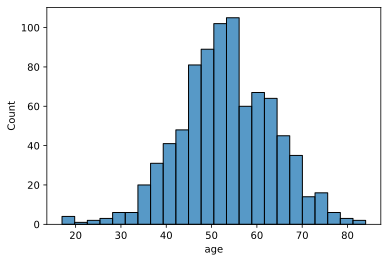

In [193]:
ax = sns.histplot(data['age'])

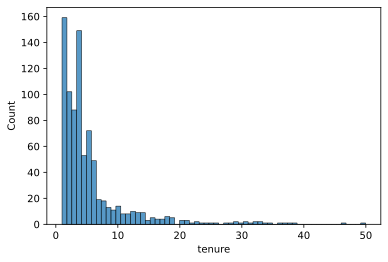

In [194]:
ax = sns.histplot(data['tenure'])

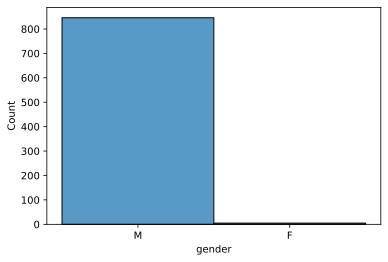

In [199]:
ax = sns.histplot(data_com3['gender'])

In [ ]:
ax = sns.histplot(data['normal_tenure'])

In [900]:
#drop growth_rate
data.drop(['growth_rate'], axis=1, inplace=True)

In [848]:
#delete growth_rate
data.drop([  
'growth_rate'
], axis=1, inplace=True)

In [901]:
#data.to_csv(r'/Users/zhaoshuai/Desktop/DA/Data/Data-2016/data_group_nd.csv', index = False)
data.to_csv(r'/Users/zhaoshuai/Desktop/DA/Data/Data-2016/data_norm_avggrp.csv', index = False)
# tranfert the .py file to excel/csv

In [42]:
#test automl model
#install autogluon
!pip install autogluon
!pip install "mxnet<2.0.0"

In [263]:
#train data
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import train_test_split #splitting the dataset

In [264]:
import numpy as np

In [850]:
train_data = TabularDataset('/Users/zhaoshuai/Desktop/DA/Data/Data-2016/data_normgroup.csv')

Loaded data from: /Users/zhaoshuai/Desktop/DA/Data/Data-2016/data_normgroup.csv | Columns = 21 / 21 | Rows = 851 -> 851


In [882]:
train_data = TabularDataset('/Users/zhaoshuai/Desktop/DA/Data/Data-2016/data_norm_avggrp.csv')

Loaded data from: /Users/zhaoshuai/Desktop/DA/Data/Data-2016/data_norm_avggrp.csv | Columns = 21 / 21 | Rows = 851 -> 851


In [441]:
train_data = TabularDataset('/Users/zhaoshuai/Desktop/DA/Data/Data-2016/data_allvar.csv')

Loaded data from: /Users/zhaoshuai/Desktop/DA/Data/Data-2016/data_allvar.csv | Columns = 38 / 38 | Rows = 851 -> 851


In [883]:
type(train_data)

autogluon.core.dataset.TabularDataset

In [835]:
id, label = 'leader', 'growth_rate'
#data cleaning
#large_val_cols = ['age','tenure']
#for c in large_val_cols:
#    train_data[c] = np.log(train_data[c]+1)

In [890]:
#change label into growth_rate group
id, label = 'leader', 'growth_rate_arggrp'
#data cleaning
#large_val_cols = ['age','tenure']
#for c in large_val_cols:
#    train_data[c] = np.log(train_data[c]+1)

In [885]:
train_data.columns

Index(['ccode', 'leader', 'entry', 'exit', 'exitcode', 'prevtimesinoffice',
       'posttenurefate', 'gender', 'yrborn', 'yrdied', 'numentry', 'numexit',
       'yrbegin', 'yrend', 'age', 'tenure', 'pop_x', 'begin_gdppc', 'pop_y',
       'fties_range', 'growth_rate_arggrp'],
      dtype='object')

In [886]:
train_data.head()

,ccode,leader,entry,exit,exitcode,prevtimesinoffice,posttenurefate,gender,yrborn,yrdied,...,numexit,yrbegin,yrend,age,tenure,pop_x,begin_gdppc,pop_y,fties_range,growth_rate_arggrp
0,0.0,Grant,0.0,0.0,0.307692,0.0,0.833333,0.5,0.158228,0.058394,...,0.0,0.071429,0.041958,0.447761,0.142921,0.038437,0.096155,0.039998,0.5,1
1,0.0,Hayes,0.0,0.0,0.307692,0.0,0.833333,0.5,0.158228,0.116788,...,0.0,0.123377,0.069930,0.567164,0.061228,0.042037,0.099577,0.048091,0.5,1
2,0.0,Arthur,0.0,0.0,0.307692,0.0,0.833333,0.5,0.202532,0.065693,...,0.0,0.149351,0.097902,0.522388,0.050101,0.046222,0.126387,0.052595,0.5,1
3,0.0,Cleveland,0.0,0.0,0.307692,0.0,0.833333,0.5,0.253165,0.226277,...,0.0,0.175325,0.125874,0.462687,0.061228,0.050407,0.128735,0.057829,0.5,1
4,0.0,Harrison,0.0,0.0,0.307692,0.0,0.833333,0.5,0.227848,0.175182,...,0.0,0.201299,0.153846,0.582090,0.061228,0.054656,0.134928,0.063066,0.5,1


In [887]:
train_data.describe()

,ccode,entry,exit,exitcode,prevtimesinoffice,posttenurefate,gender,yrborn,yrdied,numentry,numexit,yrbegin,yrend,age,tenure,pop_x,begin_gdppc,pop_y,fties_range,growth_rate_arggrp
count,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,824.000000,851.000000,823.000000,851.000000,851.000000
mean,0.368658,0.091657,0.148061,0.364368,0.011751,0.632785,0.502938,0.583640,0.617582,0.091657,0.207951,0.548835,0.539513,0.541873,0.094550,0.022426,0.110613,0.025456,0.556404,4.014101
std,0.278480,0.205371,0.238190,0.170195,0.086653,0.286278,0.038235,0.210160,0.252753,0.205371,0.294624,0.211690,0.236996,0.155022,0.125550,0.064028,0.125379,0.069849,0.158272,2.006997
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000
25%,0.144880,0.000000,0.000000,0.307692,0.000000,0.500000,0.500000,0.424051,0.419708,0.000000,0.000000,0.396104,0.356643,0.440299,0.024407,0.002374,0.032128,0.002745,0.500000,2.000000
50%,0.253813,0.000000,0.000000,0.307692,0.000000,0.833333,0.500000,0.626582,0.671533,0.000000,0.000000,0.597403,0.587413,0.537313,0.061228,0.005752,0.069051,0.006458,0.500000,4.000000
75%,0.592593,0.000000,0.200000,0.307692,0.000000,0.833333,0.500000,0.750000,0.824818,0.000000,0.366667,0.707792,0.727273,0.641791,0.102047,0.019587,0.135529,0.022125,0.500000,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [888]:
#split train data and test data
df_train,df_test=train_test_split(train_data, test_size=0.33, random_state=1)
df_train.shape, df_test.shape

((570, 21), (281, 21))

In [891]:
predictor = TabularPredictor(label=label).fit(
    df_train.drop(columns=[id, 'leader']))

No path specified. Models will be saved in: "AutogluonModels/ag-20220410_080350/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220410_080350/"
AutoGluon Version:  0.3.1
Train Data Rows:    570
Train Data Columns: 19
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	7 unique label values:  [1, 4, 3, 5, 6, 2, 7]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 7
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    342.5 MB
	Train Data (Original)  Memory Usage: 0.09 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify spe

In [892]:
predictor.leaderboard(df_test.drop(columns=[id, 'leader']), silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,CatBoost,0.960854,1.000000,0.007123,0.001509,0.618660,0.007123,0.001509,0.618660,1,True,6
1,WeightedEnsemble_L2,0.960854,1.000000,0.010578,0.002136,0.730619,0.003455,0.000627,0.111959,2,True,10
2,RandomForestGini,0.957295,0.964912,0.130173,0.107910,0.511686,0.130173,0.107910,0.511686,1,True,4
3,RandomForestEntr,0.953737,0.929825,0.132809,0.107749,0.513531,0.132809,0.107749,0.513531,1,True,5
4,ExtraTreesGini,0.854093,0.877193,0.146801,0.107583,0.509798,0.146801,0.107583,0.509798,1,True,7
5,ExtraTreesEntr,0.850534,0.877193,0.149571,0.108037,0.515325,0.149571,0.108037,0.515325,1,True,8
6,NeuralNetMXNet,0.718861,0.745614,2.044115,1.496301,14.236033,2.044115,1.496301,14.236033,1,True,9
7,NeuralNetFastAI,0.715302,0.745614,0.018299,0.011590,0.530608,0.018299,0.011590,0.530608,1,True,3
8,KNeighborsDist,0.562278,0.570175,0.112195,0.109851,0.006217,0.112195,0.109851,0.006217,1,True,2
9,KNeighborsUnif,0.544484,0.561404,0.109570,0.116935,0.013755,0.109570,0.116935,0.013755,1,True,1


In [894]:
predictor.feature_importance(df_test, subsample_size=None)

Computing feature importance via permutation shuffling for 20 features using 281 rows with 3 shuffle sets...
	1.91s	= Expected runtime (0.64s per shuffle set)
	0.13s	= Actual runtime (Completed 3 of 3 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
ccode,0.822064,0.033948,0.000284,3,1.016590,0.627538
pop_y,0.010676,0.003559,0.017549,3,0.031068,-0.009716
pop_x,0.004745,0.002055,0.028595,3,0.016518,-0.007028
yrbegin,0.004745,0.002055,0.028595,3,0.016518,-0.007028
numexit,0.003559,0.000000,0.500000,3,0.003559,0.003559
begin_gdppc,0.002372,0.004109,0.211325,3,0.025919,-0.021174
exitcode,0.001186,0.002055,0.211325,3,0.012959,-0.010587
posttenurefate,0.001186,0.002055,0.211325,3,0.012959,-0.010587
yrborn,0.001186,0.002055,0.211325,3,0.012959,-0.010587
yrend,0.001186,0.002055,0.211325,3,0.012959,-0.010587


In [895]:
predictor.evaluate(df_test.drop(columns=[id, 'leader']))

Evaluation: accuracy on test data: 0.9608540925266904
Evaluations on test data:
{
    "accuracy": 0.9608540925266904,
    "balanced_accuracy": 0.9623606455730459,
    "mcc": 0.9546682751837687
}


{'accuracy': 0.9608540925266904,
 'balanced_accuracy': 0.9623606455730459,
 'mcc': 0.9546682751837687}

In [ ]:
#better model with GPU, data contain large amout of text, use multimodal to transform characteristics,
#multi-model fusion
#hyperparameters='multimodal',
#num_stack_levels=1, num_bag_folds=5

<font color='red' size=0>7.4 Group the data by Polity datasets IV category</font> 

In [ ]:
#Group by the three types, and count the number of each group of the three
df1.groupby(['Polity datasets IV category']).count()

<font color='red' size=0>7.5 Draw a figure to see the difference between each group in Polity datasets</font> 

In [ ]:
#Use seaborn package to visualize the difference between the three types
import seaborn as sns
ax= sns.histplot(df1['Polity datasets IV category'])

<font color='red' size=0>7.6 Group the data by countries</font> 

In [ ]:
df1.groupby(['Country-id']).mean()

In [ ]:
print(df1)

<font color='blue' size=2> Deal with the dataset with the name df2(Countries vs gdppc)</font> 

<font color='red' size= 2>8. Read the data about gdppc from excel with the name df2</font> 

In [ ]:
#Import the data about countries with yearly Real GDP per capita in 2011$
df2 = pd.read_excel (r'D:/Zhao Shuai/phd/lingnan/literature/Data/mpd2020.xlsx', sheet_name='Full data')

<font color='red' size=0>8.1 Summary about df2</font> 

In [ ]:
df2.dtypes

In [ ]:
#See the overall head of df2
df2.head

In [ ]:
#Shows the rows count and the types
df2.info()

In [ ]:
df2.describe()

<font color='red' size=0>8.2 Choose the data after 1945</font>

In [ ]:
df2.drop( df2[ df2['year'] < 1945 ].index , inplace=True) 
print(df2)

<font color='red' size=0>8.3 Delete the NaN and  Null value and abnormal data</font> 

In [ ]:
#Check all the data
#Delete the NaN and  Null value and abnormal data
df2.describe(include = 'all')

In [ ]:
#let’s see what is the proportion of NaN values using a visualization library called seaborn.
#In this heatmap, you can see in yellow (depending on the cmap you are using, but with mine it’s yellow) the NaN values in each column.
sns.heatmap(df2.isnull(), cmap='viridis')

In [ ]:
#We will just keep the rows with a value in the gdppc column
df2 = df2.dropna(subset=['gdppc'])
print(df2)

<font color='red' size=0>8.4 Check the data</font> 

In [ ]:
print(df2)

In [ ]:
#Check whether gdppc has abnormal numbers or not
df2.groupby(['gdppc']).mean()

In [ ]:
#Check whether country has abnormal numbers or not
df2.groupby(['country']).mean()

<font color='red' size=0>8.5 Delete the 0 in gdppc</font> 

In [ ]:
#Deleter the 0 in gdppc
#df2.loc[(df2!='0.0000').any(axis=1)]
df2= df2[df2['gdppc'] != 0]
print(df2)

In [ ]:
#Check if I delete the gdppc with 0
df2.groupby('gdppc').mean()

<font color='red' size=0>8.6 Group by country</font> 

In [ ]:
#Group by country, and save the dataframe with name df2_cty, gdppc is the average value in these years.
df2_cty = df2.groupby('country').mean()
print(df2_cty)

In [ ]:
#Check the type for each column
df2_cty.dtypes

In [ ]:
#Because I have more than 100 countries, so I choose the first 30 to check
df2_cty.head(30)

In [ ]:
#Visualize the first 30 countries by gdppc
df2_cty.head(30).plot(kind='barh', y= 'gdppc')
#plt.savefig('medals.svg')

<font color='red' size=0>8.7 Draw a boxplot to show the gdppc for different countries</font>

In [ ]:
#Show the gdppc of each country

#plt.savefig('medals.svg')

In [ ]:
#Data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
display.set_matplotlib_formats('svg')

<font color='red' size=0>8.8 Draw a line to show the changes of U.S. gdppc over time</font>

In [ ]:
#Choose a single country, for example, choose the subset of United States
df2_usa = df2[df2.country == 'United States']
print(df2_usa)

In [ ]:
#The change in per capita GDP of a country over time
plt.figure(figsize=(10,5))
sns.relplot(x="year", y="gdppc", kind="line", data=df2_usa)

In [ ]:
# Create figure and plot space, what's wrong?
fig, ax = plt.subplots(figsize=(10, 6))

# Add x-axis and y-axis
ax.plot(df2['year'],
        df2['gdppc'],
        df2['country'] == 'United States', 
        color='blue',)

# Set title and labels for axes
ax.set(xlabel="Year",
       ylabel="Real GDP per capita in 2011$",
       title="Gdppc in different year")

plt.show()

<font color='red' size=0>8.9 Choose the top 20 countries with more data in gdppc</font>

In [ ]:
df2['country'].value_counts()[0:20]

<font color='red' size=0>8.10 Compare the gdppc between China and United States</font>

In [ ]:
#Choose China and United States in country
compare=df2['country'].isin(['China','United States'])
#sns.displot(pd.DataFrame({'gdppc': df2[compare]['year'],'country': df2[compare]['country']}),x= 'gdppc', hue='country', kind='kde');

#sns.set(style='darkgrid',)
 
# Draw line plot of size and total_bill with parameters and hue "day"
sns.lineplot(x = "year", y = "gdppc", data = df2[compare])
 
plt.title("Line", fontsize = 15)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("gdppc", fontsize = 15)
plt.show()

In [ ]:
#Compare their gdppc for max, min, mean, etc
ax = sns.boxplot (x = 'country', y = 'gdppc', data = df2[compare], fliersize=0)
ax.set_ylim([0, 45000]);

<font color='blue'  size=2>Analyze data across diferent py tables</font>

<font color='red'  size=2>See the relationship between national leaders' gender, tenure and gdppc,TBC</font>

In [ ]:
#ax = plt.subplots (figsize = (6,6))
#columns = ['']
#Covariance to be continued

<font color='red'  size=2>I wanted to use a map to show the tenure and gender of the leaders of various countries, but it didn't happen.TBC</font> 

In [ ]:
import folium

In [ ]:
#unction to convert to alpah2 country codes and continents
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_continent)
get_continent(dta2016.idacr)

<font color='red'  size=2>Get the lantitude and longitude for each country,TBC</font>

In [ ]:
#installation
!pip install pycountry-convert
#function to convert to alpah2 country codes and continents
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(df2)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_continent)


In [ ]:
print(df2)

In [ ]:
!pip install geopy

In [ ]:
#function to get longitude and latitude data from country name
from geopy.geocoders import Nominatim
geolocator = Nominatim()
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan
    df2["Longitude"] = longitude
df2["Latitude"] = latitude

In [ ]:
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
# declare an empty list to store
# latitude and longitude of values 
# of cuntry column
longitude = []
latitude = []
   
# function to find the coordinate
# of a given city 
def findGeocode(country):
       
    # try and catch is used to overcome
    # the exception thrown by geolocator
    # using geocodertimedout  
    try:
          
        # Specify the user_agent as your
        # app name it should not be none
        geolocator = Nominatim(user_agent="your_app_name")
          
        return geolocator.geocode(country)
      
    except GeocoderTimedOut:
          
        return findGeocode(country)    
  
# each value from country column
# will be fetched and sent to
# function find_geocode   
for i in (df2["country"]):
      
    if findGeocode(i) != None:
           
        loc = findGeocode(i)
          
        # coordinates returned from 
        # function is stored into
        # two separate list
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
       
    # if coordinate for a city not
    # found, insert "NaN" indicating 
    # missing value 
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)
       
df2["Longitude"] = longitude
df2["Latitude"] = latitude

df2

In [ ]:
!pip install geolocator
import geolocator
loc = geolocator.geocode(df2.country, exactly_one=False)

In [ ]:
!pip install autogluon